# Aprendizaje de Máquina – Proyecto Final (Guía del cuaderno)

Grupo 4 - Precios Claros - Base SEPA

Nombres del grupo

* a2107 – Calabia, Juan Manuel
* a2110 – Ceballos, Luciano
* a2102 – Andújar, Martín Rodrigo
* a2125 – Otonelo Canale, Nahuel Elías



# 1. Descripción y Carga de Datos

**Introducción**

La base de datos utilizada proviene de la Subsecretaría de Defensa del Consumidor y Lealtad Comercial (Argentina) que contiene los precios de comercios minoristas (grandes establecimientos) de más de 70 mil productos en todo el país.

**Planteo del problema**

Algunos registros contienen productos que se encuetran en promocion. El objetivo de este proyecto es **predecir el descuento (%) aplicado a los productos** (considerando solo los productos en descuentos) a partir de variables relacionadas con productos, sucursales y comercios. Para esto, se utiliza un **subconjunto del dataset Precios Claros**, específicamente las promociones registradas.

La **variable objetivo** (target) se define como:  

$$
\text{descuento} = 100 \times \left(1 - \frac{\text{precio_promo}}{\text{precio_lista}}\right)
$$
<br>
Esta métrica refleja el porcentaje de rebaja aplicado sobre el precio de lista de cada producto.
<br><br>
El objetivo de este proyecto es **predecir el porcentaje de descuento (`descuento`)** en productos de supermercado utilizando datos de **Precios Claros - Base SEPA** (Sistema Electrónico de Publicidad de Precios Argentinos).  

Fuente de datos: [datos.gob.ar](https://datos.gob.ar/dataset/produccion-precios-claros---base-sepa) (descarga del **27-06-2025**).  

---

## Dataframes Utilizados
- `productos`  
- `sucursales`  
- `comercios`  

---

## Variable Objetivo
La variable **`descuento`** se construyó a partir de precios de lista y de promoción:  

$$
descuento = 100 \times \left(1 - \frac{precio\_promo}{precio\_lista}\right)
$$  

---

## Preparación de Datos
- Se **unificaron las tres tablas** mediante un **join**.  
- Se persistieron los datasets depurados para su reutilización:  
  - `promociones.pkl`  
  - `sucur.pkl`  
  - `comercio.pkl`  

# 2. Exploración y Preprocesamiento

## Objetivo
Se realizó un **EDA exhaustivo** para entender la estructura, calidad y patrones de las variables.  

---

## Cardinalidad y Limpieza
- Se exploraron los **valores únicos** en columnas clave.  
- Se eliminaron variables por ser **constantes, muy nulas o de alta cardinalidad**:  
  - `id_comercio`  
  - `productos_leyenda_promo2`  
  - `productos_precio_unitario_promo2`  
  - `productos_ean`  

---

## Outliers y Valores Extremos
- Los **precios de lista** se analizaron con el método **IQR**.  
- Se creó una **vista sin outliers** para mejorar visualizaciones.  
- Se revisaron registros con precios **máximos y mínimos** para validar la calidad de los datos.  

---

## Valores Faltantes
- Los registros que contienen **NaN** en columnas de promoción indican que ese producto no contiene promocion.  
- En `productos_marca`, se imputó con **'N/A'** para evitar pérdida de registros.  

---

## Visualizaciones
- **Histogramas** y **boxplots** de precios y descuentos.  
- **Gráficos de dispersión** mostraron una relación **débil** entre precio y descuento → sugiere la necesidad de **modelos no lineales** y la utilización de mas carácterísticas.  

# 3. Preparación de Datos y Selección de Características

En esta etapa se prepararon los datos aplicando un proceso riguroso para evitar **fuga de datos (data leakage)**.  

---

## Selección de Features
- Variables seleccionadas:  
  - `id_bandera`  
  - `productos_marca`  
  - `productos_precio_lista`  
  - `descuento` (target)  
- Se excluyeron otras variables por irrelevancia o redundancia.  

---

## División y Preprocesamiento
- Dataset dividido en **train** y **test**.  
- **Outliers** tratados con método **IQR**.  
- Escalado **MinMaxScaler** aplicado solo a `productos_precio_lista`.  
- Variables categóricas codificadas con **OneHotEncoder**  
  (`handle_unknown='ignore'`, `drop='first'`).  

---

## Reducción de Dimensionalidad (sin fuga)
Se aplicaron tres filtros secuenciales:  
1. **Umbral de varianza** en variables numéricas.  
2. **Filtro de rareza** en variables dummy.  
3. **Ranking por correlación** para eliminar redundancias.  

---

## Serialización
Se guardaron los datasets y metadatos para garantizar **reproducibilidad**:  
- `df.pkl`  
- `train_idx.pkl`  
- `test_idx.pkl`  
- `df_meta.pkl`

# Descriptivos y outliers de precio

Se analizan estadísticas y **outliers** en `productos_precio_lista` con **IQR**. Creamos una vista **sin outliers** para visualizar mejor sin sobrescribir el dataset original.

# 4. Modelización y Evaluación

## Problema
Se abordó un **problema de regresión** (target continuo = `descuento`) y se compararon dos modelos:  
- Árbol de Decisión  
- Random Forest (Opción B del TP)  

---

## Búsqueda de Hiperparámetros
Se utilizó un **GridSearchCV ligero** sobre una submuestra del dataset para optimizar los modelos.  

---

## Resultados de la Validación Cruzada
- **Random Forest** superó al Árbol de Decisión  
- R² = **0.459** (RF) vs. **0.346** (Árbol)  
- Confirmó que el **ensemble reduce la varianza** y generaliza mejor.  

---

## Evaluación del Modelo Final
Explicación de métricas
- **MAE (Mean Absolute Error / Error Absoluto Medio):** indica, en promedio, cuántos puntos de descuento nos desviamos de la predicción real. Es fácil de interpretar y útil para evaluar la precisión del modelo.  
- **RMSE (Root Mean Squared Error / Raíz del Error Cuadrático Medio):** penaliza más los errores grandes (outliers), por lo que es sensible a predicciones muy alejadas del valor real.  
- **R² (Coeficiente de determinación):** representa la proporción de la varianza explicada por el modelo. Un R² alto indica que el modelo captura buena parte de la variabilidad del descuento, pero un valor sospechosamente alto puede indicar **data leakage** (fuga de información).

El `RandomForestRegressor`, entrenado con los mejores hiperparámetros, logró:  
- **MAE = 4.37 p.p.**  
- **RMSE = 9.03 p.p.**  
- **R² = 0.645** en el conjunto de test.  

---

## Techo de Desempeño (Ceiling)
- R² máximo teórico estimado: **0.706**  
- El modelo final (**R² = 0.645**) captura ≈ **91% de la varianza explicable**.  

---

##Análisis de resultados

El modelo se evaluó en los conjuntos de entrenamiento y test calculando las siguientes métricas:  

- **MAE (Mean Absolute Error / Error Absoluto Medio)**: indica el error promedio en puntos de descuento.  
- **RMSE (Root Mean Squared Error / Raíz del Error Cuadrático Medio)**: penaliza más los errores grandes, útil para detectar outliers.  
- **R² (Coeficiente de determinación)**: representa la proporción de varianza explicada por el modelo.  

Los resultados obtenidos fueron:  

- **Train:** MAE = X, RMSE = Y, R² = Z  
- **Test:** MAE = X', RMSE = Y', R² = Z'  

Esto permite evaluar si el modelo tiene **sobreajuste (overfitting)**, comparando train vs test.  

- **Comparación entre modelos:**
Evaluar qué modelo funciona mejor según MAE, RMSE y R², y analizar posibles razones (sobreajuste, capacidad de capturar no linealidades, etc.).
<br><br>
- **Visualizaciones de importancia de variables:**
Para interpretar qué variables explican más el descuento, se usó **SHAP**, que permite ver tanto la importancia promedio de cada feature como cómo cada valor de la variable afecta la predicción.

# 5. Conclusiones e Implicancias

El **Random Forest** es el modelo final recomendado porque demostró ser más robusto y preciso.  

## Importancia de Variables
- **productos_precio_lista** domina la predicción (≈ 0.416), lo que sugiere que el precio base es el principal predictor.  
- La **marca** y el **formato de la tienda (id_bandera)** también son factores determinantes.  

## Conclusión
El modelo logra un **R² de X** y un **MAE de Y**, lo que implica un error promedio de Y puntos de descuento.

Las **variables más influyentes** resultaron ser: `precio_lista`, `marca`, `sucursal` (o las que aparezcan en el análisis).

**Limitaciones:**  
- Posible **data leakage** por información derivada del precio.  
- Calidad de datos: precios duplicados, errores de carga, promociones inconsistentes.

**Trabajo futuro:**  
- Mejorar limpieza de datos.  
- Probar **redes neuronales** o modelos de **gradient boosting más profundos**.  
- Evaluar técnicas de regularización y selección de variables para reducir sobreajuste.

## 1 - Exploración y comprensión de los datos

### Exploración del dataframe productos

(luego se explorarán los otros dataframes)

In [2]:
!pip install gdown

import gdown
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.ticker as mticker
import shap

In [3]:
import sys
print(sys.executable)


/usr/bin/python3


Leemos el csv y traemos los datos como object. Luego los modificamos y transformamos al formato adecuado.

In [4]:
# Url al drive con los datasets .csv
url = "https://drive.google.com/drive/folders/1lG8QrERAQPhw-iBLtAvkQGS5dZl-V_px?usp=sharing"

# Descargar todos los archivos de la carpeta
gdown.download_folder(url, output=".", quiet=False, use_cookies=False)


# Leer una parte (ejemplo: primeras 1000 filas)
producto = pd.read_csv("productos.csv", sep="|", encoding="utf-8", dtype=str)

Retrieving folder contents


Processing file 11sq7sne3og64t-BKJyDT5hGic4nAPlO9 comercio.csv
Processing file 1hV9cF4cy90NGrcHG0rnx5Se_fErk5VYf productos.csv
Processing file 1i_Pc3mLvZhLJlkqsC32pSyPhBcxNex2_ sucursales.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=11sq7sne3og64t-BKJyDT5hGic4nAPlO9
To: /content/comercio.csv
100%|██████████| 478/478 [00:00<00:00, 1.61MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1hV9cF4cy90NGrcHG0rnx5Se_fErk5VYf
From (redirected): https://drive.google.com/uc?id=1hV9cF4cy90NGrcHG0rnx5Se_fErk5VYf&confirm=t&uuid=d793df1f-388f-4554-bc85-b773dc143956
To: /content/productos.csv
100%|██████████| 331M/331M [00:06<00:00, 49.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1i_Pc3mLvZhLJlkqsC32pSyPhBcxNex2_
To: /content/sucursales.csv
100%|██████████| 124k/124k [00:00<00:00, 4.72MB/s]
Download completed


Miraremos los valores únicos para determinar la importancia de cada atributo

In [5]:
# Lista de las columnas de las que quieres ver los valores únicos
columnas_a_revisar = [
    'productos_ean',
    'id_bandera',
    'id_comercio',
    'id_sucursal',
    'productos_cantidad_presentacion',
    'productos_cantidad_referencia',
    'productos_leyenda_promo1',
    'productos_precio_unitario_promo1',
    'productos_leyenda_promo2',
    'productos_precio_unitario_promo2'
]

# Iterar sobre la lista de columnas e imprimir los valores únicos de cada una
print("--- Valores Únicos por Columna ---")
for col in columnas_a_revisar:
    # Comprobamos si la columna existe en el DataFrame para evitar errores
    if col in producto.columns:
        valores_unicos = producto[col].unique()
        print(f"\nColumna: '{col}'")
        print(valores_unicos)
    else:
        print(f"\nAdvertencia: La columna '{col}' no se encontró en el DataFrame.")

--- Valores Únicos por Columna ---

Columna: 'productos_ean'
['1' '0' nan]

Columna: 'id_bandera'
['1' '3' '2' nan]

Columna: 'id_comercio'
['10' 'Ultima actualización: 2025-06-27T05:13:49-03:00']

Columna: 'id_sucursal'
['63' '711' '44' '62' '147' '54' '438' '290' '482' '289' '125' '123' '697'
 '48' '288' '23' '462' '599' '15' '212' '557' '656' '563' '1' '16' '526'
 '767' '120' '272' '241' '161' '21' '490' '28' '203' '268' '175' '150'
 '17' '605' '205' '41' '183' '263' '9' '240' '719' '46' '265' '348' '577'
 '11' '5' '536' '299' '338' '450' '8' '29' '229' '31' '386' '766' '216'
 '714' '259' '182' '497' '214' '600' '597' '757' '184' '22' '12' '650'
 '729' '747' '115' '341' '616' '219' '211' '7' '367' '10' '694' '218'
 '232' '226' '234' '255' '363' '2' '47' '297' '215' '277' '119' '239'
 '496' '18' '233' '217' '296' '213' '735' '792' '295' '580' '191' '796'
 '466' '26' '179' '415' '51' '143' '672' '667' '627' '680' '574' '162'
 '243' '118' '475' '130' '42' '391' '33' '429' '52' '30' '22

**Columnas a eliminar:**
- id_comercio: porque en todos los registros es 10 (el id 10 pertenece a Carrefour)
- productos_leyenda_promo2: las columnas de promo_2 tienen valores nulos
- productos_precio_unitario_promo2
- productos_ean: es una codificacion de codigo de barras que no aporta al modelo


Podemos eliminarlas porque consideramos que no aportan informacion


**Columnas para pasar a int**
- id_sucursal
- productos_cantidad_referencia

**Columnas para convertir a float32**  
- productos_precio_lista
- productos_precio_referencia
- productos_precio_unitario_promo1

Las otras columnas las dejamos como string


In [6]:
producto.drop(columns=[
    'productos_ean',
    'id_comercio',
    'productos_cantidad_presentacion',
    'productos_leyenda_promo2',
    'productos_precio_unitario_promo2'
], inplace=True)


columnas_a_convertir_int = [
    'id_bandera',
    'id_sucursal',
    'productos_cantidad_referencia'
]



for col in columnas_a_convertir_int:
    if col in producto.columns:

        # Paso A: Convertir a numérico, forzando errores a NaN
        producto[col] = pd.to_numeric(producto[col], errors='coerce')

        # Paso B: Convertir a tipo entero nulable (Int64)
        producto[col] = producto[col].astype('Int64')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")


columnas_a_convertir_float = [
    'productos_precio_lista',
    'productos_precio_referencia',
    'productos_precio_unitario_promo1'
]


for col in columnas_a_convertir_float:
    if col in producto.columns:

        # Paso A: Convertir a numérico, forzando errores y vacíos a NaN
        # Paso B: Convertir al tipo float32 para ahorrar memoria
        producto[col] = pd.to_numeric(producto[col], errors='coerce').astype('float32')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")

producto['productos_marca'] = producto['productos_marca'].replace('S/D', pd.NA)
producto['productos_marca'] = producto['productos_marca'].astype('string')



In [7]:

for col, dtype in producto.dtypes.items():
    # Verificamos si el tipo de dato actual de la columna es 'object'
    if dtype == 'object':
        #print(f"Transformando columna '{col}' de tipo '{dtype}' a 'string'...")
        # Si es 'object', la convertimos a 'string'
        # Esto también se encargará de convertir None/np.nan a pd.NA si los hay.
        producto[col] = producto[col].astype('string')

producto.to_pickle('producto.pkl')
print(producto.dtypes)

id_bandera                                       Int64
id_sucursal                                      Int64
id_producto                             string[python]
productos_descripcion                   string[python]
productos_unidad_medida_presentacion    string[python]
productos_marca                         string[python]
productos_precio_lista                         float32
productos_precio_referencia                    float32
productos_cantidad_referencia                    Int64
productos_unidad_medida_referencia      string[python]
productos_precio_unitario_promo1               float32
productos_leyenda_promo1                string[python]
dtype: object


En el listado anterior pueden verse los tipos de variables. Para valores enteros, se uso Int64, float32 para decimales y string (en lugar de object) para caracteres.

In [8]:
producto.describe()

,id_bandera,id_sucursal,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_precio_unitario_promo1
count,2944410.0,2944410.0,2.944410e+06,2.944410e+06,2944410.0,1.301340e+05
mean,1.920532,284.582108,1.357243e+04,2.456660e+04,333.566095,8.431066e+04
std,0.886544,231.803274,7.880480e+04,1.836935e+05,491.608742,2.300750e+05
min,1.0,1.0,2.800000e-01,1.600000e-01,0.0,1.900000e+01
25%,1.0,56.0,1.799000e+03,3.633330e+03,7.0,1.959000e+03
50%,2.0,229.0,3.240000e+03,8.500000e+03,170.0,6.990000e+03
75%,3.0,461.0,6.655000e+03,1.829412e+04,500.0,3.999000e+04
max,3.0,810.0,7.349000e+06,4.203333e+07,8000.0,6.199000e+06


**Eliminacion de Outliers para poder ver la distribucion de precios**

Creemos que es relevante eliminar los valores ouliers de la columna productos_precio_lista, pero sin sobreescribir el dataframe, es decir, creamos otro dataframe llamado producto_sin_outliers.

In [9]:
# 1. Define las columnas de precios a revisar
columnas_precio = [
    'productos_precio_lista',

]

# 2. Inicializa una máscara booleana para marcar filas como outliers.
#    Inicialmente, ninguna fila es considerada un outlier.
is_outlier = pd.Series(False, index=producto.index)

# 3. Itera sobre cada columna de precios para encontrar sus outliers
for col in columnas_precio:

    if col in producto.columns and not producto[col].isnull().all():
        # Calcula Q1, Q3 y el IQR para la columna actual
        Q1 = producto[col].quantile(0.25)
        Q3 = producto[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calcula los límites
        limite_inferior = 0
        limite_superior = Q3 + 1.5 * IQR

        # Identifica los outliers para ESTA columna
        outliers_en_columna = (producto[col] < limite_inferior) | (producto[col] > limite_superior)

        # Actualiza la máscara general. Una fila se marca como outlier
        # si es un outlier en la columna actual O si ya estaba marcada.
        is_outlier = is_outlier | outliers_en_columna

        print(f"\nRevisando '{col}':")
        print(f"  - Límite inferior: {limite_inferior:.2f}, Límite superior: {limite_superior:.2f}")
        print(f"  - Outliers encontrados en esta columna: {outliers_en_columna.sum()}")

# 4. Filtra el DataFrame original para quedarte solo con las filas que NO son outliers
#    El operador ~ invierte la máscara (True se vuelve False y viceversa)
producto_sin_outliers = producto[~is_outlier]

#producto_sin_outliers



Revisando 'productos_precio_lista':
  - Límite inferior: 0.00, Límite superior: 13939.00
  - Outliers encontrados en esta columna: 334327


¿Cuales son los productos mas costosos y cuales los menos costosos?

Podemos ver que el mas costoso, esta en 3 sucursales distintas y al mismo precio.

In [10]:
producto.loc[producto['productos_precio_lista']==producto['productos_precio_lista'].max()]

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1
53507,1,2,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,<NA>,7349000.0,7349000.0,1,UNI,6199000.0,Promo A valida desde el 24/06/2025 hasta 29/06...
776165,1,11,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,<NA>,7349000.0,7349000.0,1,UNI,NaN,<NA>
787613,1,8,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,<NA>,7349000.0,7349000.0,1,UNI,NaN,<NA>


El producto mas costoso es un televisor de 77 pulgadas. Es interesante ver que ese producto está al mismo precio en 3 distintas sucursales.

In [11]:
producto.loc[producto['productos_precio_lista']==producto['productos_precio_lista'].min()]

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1
942985,1,128,7798111301552,BOLSA AMERICANA 26X12X37.5 X 500 UNID,UNI,<NA>,0.28,0.28,1,UNI,NaN,<NA>


El producto de menos precio es una bolsa. Muy posiblemente este producto no exista realmente ya que ese precio no tiene sentido.

In [12]:

# Porcentaje de valores faltantes
faltantes = producto.isnull().mean().sort_values(ascending=False)*100
faltantes[faltantes > 0]


,0
productos_leyenda_promo1,95.580305
productos_precio_unitario_promo1,95.580305
productos_marca,8.424503
id_bandera,0.000034
productos_descripcion,0.000034
id_producto,0.000034
id_sucursal,0.000034
productos_unidad_medida_presentacion,0.000034
productos_precio_referencia,0.000034
productos_precio_lista,0.000034


In [13]:
producto.iloc[-1]

,2944410
id_bandera,<NA>
id_sucursal,<NA>
id_producto,<NA>
productos_descripcion,<NA>
productos_unidad_medida_presentacion,<NA>
productos_marca,<NA>
productos_precio_lista,NaN
productos_precio_referencia,NaN
productos_cantidad_referencia,<NA>
productos_unidad_medida_referencia,<NA>


**Análisis de tipo de valores faltantes**

Podemos ver que el 95.6 % de los valores de las columnas relacionadas con promo1 son nulos porque sencillamente en esas filas solo hay productos en promocion.

Hay un porcentaje de registros en productos_marca que no tienen valores.

Las filas restantes, el valor nulo corresponde a la ultima fila que es un valor erroneo o faltante. En realidad esa fila correspondia a la fecha de actualizacion del archivo csv.

Creamos el dataframe _promociones_ que será el dataframe producto pero sin los valores nulos.


In [14]:
promociones = producto[producto['productos_precio_unitario_promo1'].notnull()].copy()
# Creamos la columna descuento que será la columna que es la que intentaremos predecir.
promociones['descuento'] = (promociones['productos_precio_lista']- promociones['productos_precio_unitario_promo1'])/promociones['productos_precio_lista']*100
promociones.to_pickle('promociones.pkl')

### Analisis Exploratorio de los otros dataframes

Analizaremos ahora los dataframes _sucursales_ y _comercio_, usaremos las columas que tienen informacion para el modelo.

In [15]:
# Ruta al archivo en tu Google Drive
ruta = "sucursales.csv"

# Leer una parte (ejemplo: primeras 1000 filas)
sucursales = pd.read_csv(ruta, sep="|", encoding="utf-8", dtype=str)
sucursales.sample(10)

,id_comercio,id_bandera,id_sucursal,sucursales_nombre,sucursales_tipo,sucursales_calle,sucursales_numero,sucursales_latitud,sucursales_longitud,sucursales_observaciones,...,sucursales_codigo_postal,sucursales_localidad,sucursales_provincia,sucursales_lunes_horario_atencion,sucursales_martes_horario_atencion,sucursales_miercoles_horario_atencion,sucursales_jueves_horario_atencion,sucursales_viernes_horario_atencion,sucursales_sabado_horario_atencion,sucursales_domingo_horario_atencion
488,10,2,216,Vicente López - Maipú,Hipermercado,Av. Maipú,940,-34.529452,-58.480779,NaN,...,1638,Vicente López,AR-B,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,09:00 a 20:00
218,10,2,516,San Isidro Súper,Supermercado,Cosme Beccar,437,-34.470353,-58.514687,NaN,...,1419,San Isidro,AR-B,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,09:00 a 20:00
391,10,1,22,Mar del Plata,Hipermercado,Av. Constitución,7598,-37.953878,-57.579192,NaN,...,7600,Mar del Plata,AR-B,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,09:00 a 20:00
372,10,3,303,Talcahuano 841,Autoservicio,Talcahuano,841,-34.598783,-58.385461,NaN,...,1013,Ciudad Autónoma de Buenos Aires,AR-C,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,10:00 a 20:00
363,10,3,649,Emilio Castro 6817,Autoservicio,Av. Emilio Castro,6817,-34.651978,-58.515854,NaN,...,1408,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,11:00 a 20:00
190,10,3,421,Av. Belgrano 3447,Autoservicio,Av. Belgrano,3447,-34.615542,-58.415062,NaN,...,1210,Ciudad Autónoma de Buenos Aires,AR-C,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,11:00 a 20:00
441,10,3,451,Guatambú 12,Autoservicio,Guatambú,12,-34.815906,-58.427561,NaN,...,1846,Almirante Brown,AR-B,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,09:30 a 19:30
432,10,2,282,Mendoza Colón,Supermercado,Av. Colón,324,-32.894355,-68.845102,NaN,...,5500,Mendoza,AR-M,10:00 a 18:00,10:00 a 18:00,10:00 a 18:00,10:00 a 18:00,10:00 a 18:00,10:00 a 18:00,10:00 a 18:00
529,10,2,295,Córdoba Granaderos,Supermercado,Bvard. Granaderos,2906,-31.374529,-64.213855,NaN,...,5000,Alto Verde,AR-X,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00
343,10,3,361,Moldes 1718,Autoservicio,Moldes,1718,-34.567226,-58.456531,NaN,...,1426,Ciudad Autónoma de Buenos Aires,AR-C,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,11:00 a 20:00


Identificamos que las columnas que aportan mas valor teniendo en cuenta el modelo que realizaremos, son las seleccionadas.

El dataframe con las columnas seleccionadas, se llama _sucur_

In [16]:
sucur = sucursales[['id_bandera', 'id_sucursal',
                         'sucursales_tipo',
                         'sucursales_codigo_postal','sucursales_provincia']].copy()
sucur

,id_bandera,id_sucursal,sucursales_tipo,sucursales_codigo_postal,sucursales_provincia
0,3,365,Autoservicio,1416,AR-C
1,3,408,Autoservicio,1068,AR-C
2,2,144,Supermercado,1900,AR-B
3,3,755,Autoservicio,1663,AR-B
4,3,479,Autoservicio,1722,AR-B
...,...,...,...,...,...
563,2,296,Supermercado,7400,AR-B
564,3,196,Supermercado,1046,AR-C
565,3,791,Autoservicio,1419,AR-C
566,2,168,Supermercado,4600,AR-Y


In [17]:
faltantes_sucur = sucur.isnull().mean().sort_values(ascending=False)*100
faltantes_sucur[faltantes_sucur > 0]

,0
id_bandera,0.176056
id_sucursal,0.176056
sucursales_tipo,0.176056
sucursales_codigo_postal,0.176056
sucursales_provincia,0.176056


El único registro con valores nulos es el último.

In [18]:
sucur.iloc[-1]

,567
id_bandera,NaN
id_sucursal,NaN
sucursales_tipo,NaN
sucursales_codigo_postal,NaN
sucursales_provincia,NaN


In [19]:
sucur['sucursales_tipo'].unique()

array(['Autoservicio', 'Supermercado', 'Hipermercado', nan], dtype=object)

In [20]:
# Ruta al archivo en tu Google Drive
ruta = "comercio.csv"

# Leer una parte (ejemplo: primeras 1000 filas)
comercio = pd.read_csv(ruta, sep="|", encoding="utf-8", dtype=str)

comercio = comercio[['id_bandera', 'comercio_bandera_nombre']]
comercio['id_bandera'] = pd.to_numeric(comercio['id_bandera'], errors='coerce')
comercio['id_bandera'] = comercio['id_bandera'].astype('Int64')
comercio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_bandera               3 non-null      Int64 
 1   comercio_bandera_nombre  3 non-null      object
dtypes: Int64(1), object(1)
memory usage: 200.0+ bytes


In [21]:
comercio.to_pickle('comercio.pkl')

In [22]:
columnas_a_convertir_int = ['id_sucursal', 'id_bandera',
       'sucursales_codigo_postal']


for col in columnas_a_convertir_int:
    if col in sucur.columns:
        #print(f"Procesando columna: '{col}'")
        # Paso A: Convertir a numérico, forzando errores a NaN
        sucur[col] = pd.to_numeric(sucur[col], errors='coerce')

        # Paso B: Convertir a tipo entero nulable (Int64)
        sucur[col] = sucur[col].astype('Int64')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")


In [23]:
for col, dtype in sucur.dtypes.items():
    # Verificamos si el tipo de dato actual de la columna es 'object'
    if dtype == 'object':
        #print(f"Transformando columna '{col}' de tipo '{dtype}' a 'string'...")
        # Si es 'object', la convertimos a 'string'
        # Esto también se encargará de convertir None/np.nan a pd.NA si los hay.
        sucur[col] = sucur[col].astype('string')

sucur.to_pickle('sucur.pkl')
print(sucur.dtypes)

id_bandera                           Int64
id_sucursal                          Int64
sucursales_tipo             string[python]
sucursales_codigo_postal             Int64
sucursales_provincia        string[python]
dtype: object


In [24]:
sucur.to_pickle('sucur.pkl')

**Generando el Tablón:**

El dataframe de nombre df será la tabla resultante del merge de las tres tablas. La creación de esta tabla es importante para poder realizar mejores visualizaciones y para realizar el modelo.

In [25]:
promociones = pd.read_pickle('promociones.pkl')
promociones.drop(columns=['id_bandera'], inplace=True)
sucur = pd.read_pickle('sucur.pkl')
comercio = pd.read_pickle('comercio.pkl')
df = promociones.merge(sucur, how='left', on='id_sucursal')
df = df.merge(comercio, how='left', on='id_bandera')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130134 entries, 0 to 130133
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id_sucursal                           130134 non-null  Int64  
 1   id_producto                           130134 non-null  string 
 2   productos_descripcion                 130134 non-null  string 
 3   productos_unidad_medida_presentacion  130134 non-null  string 
 4   productos_marca                       80376 non-null   string 
 5   productos_precio_lista                130134 non-null  float32
 6   productos_precio_referencia           130134 non-null  float32
 7   productos_cantidad_referencia         130134 non-null  Int64  
 8   productos_unidad_medida_referencia    130134 non-null  string 
 9   productos_precio_unitario_promo1      130134 non-null  float32
 10  productos_leyenda_promo1              130134 non-null  string 
 11  

_sucursales_tipo_ representa lo mismo que _comercio_bandera_nombre_??

In [26]:
df['id_bandera'] = df['id_bandera'].astype(pd.Int64Dtype())
df['sucursales_tipo'] = df['sucursales_tipo'].astype(str)

# --- Generar la tabla de frecuencia cruzada ---

print("Tabla de Frecuencia Cruzada (Crosstab):")
crosstab_result = pd.crosstab(df['sucursales_tipo'], df['id_bandera'])
#print(crosstab_result)

# --- Si quieres ver los totales por fila (tipo de sucursal) ---
#print("\nTabla con Totales por Tipo de Sucursal:")
crosstab_with_totals = pd.crosstab(df['sucursales_tipo'], df['id_bandera'], margins=True, margins_name='Total')
#print(crosstab_with_totals)
crosstab_with_totals

Tabla de Frecuencia Cruzada (Crosstab):


id_bandera,1,2,3,Total
sucursales_tipo,,,,
Autoservicio,0,0,18340,18340
Hipermercado,85814,2382,0,88196
Supermercado,4334,17966,1298,23598
Total,90148,20348,19638,130134


De acuerdo al documento de la meta data, se obtiene que:

El campo **sucursales_tipo** es una categorización de la sucursal según las características de su línea de cajas, definido por la cantidad de líneas de caja:
* Hipermercado: más de 15 cajas.
* Supermercado: entre 4 y 15 cajas.
* Autoservicio: entre 1 y 3 cajas.
  
Mientras que:
El campo **comercio_bandera_nombre** (que está relacionado directamente con *id_bandera*), es un texto que contiene el nombre comercial utilizado por el comercio para identificar un tipo de formato de comercialización propio:
* Hipermercado Carrefour
* Express
* Market


Uno esperaría que id_bandera sea directamente igual a sucursales_tipo. Pues no, como puede verse en la tabla anterior.

Como se verá mas adelante, usamos la informacion de **comercio_bandera_nombre** ya que es una clasificacion de la red de Carrefour para definir a sus comercios.

## 2- Aplicación de técnicas de visualización

**Distribución de precios**

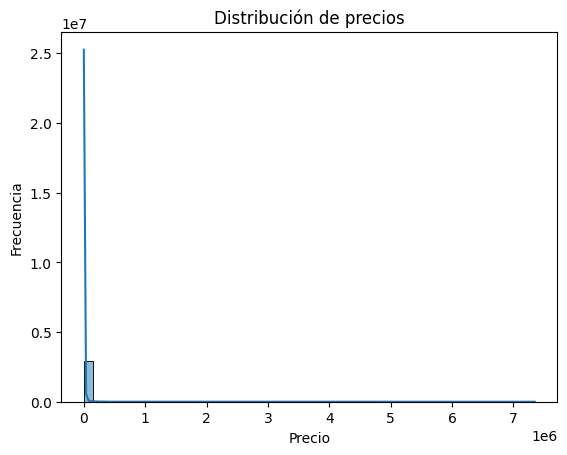

In [27]:

# Distribución de precios

sns.histplot(producto['productos_precio_lista'].dropna(), bins=50, kde=True)
plt.title("Distribución de precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

En ese gráfico no puede verse nada por la gran dispersión de los datos. Con el objetivo de visualizar mejor su distribución, graficamos la columna productos_precios del dataframe que no tiene los Outliers. Aprovechamos tambien para mostrar en el mismo gráfico la media y la mediana de ambos dataframes (con y sin ouliers).

**Impacto de valores outliers**

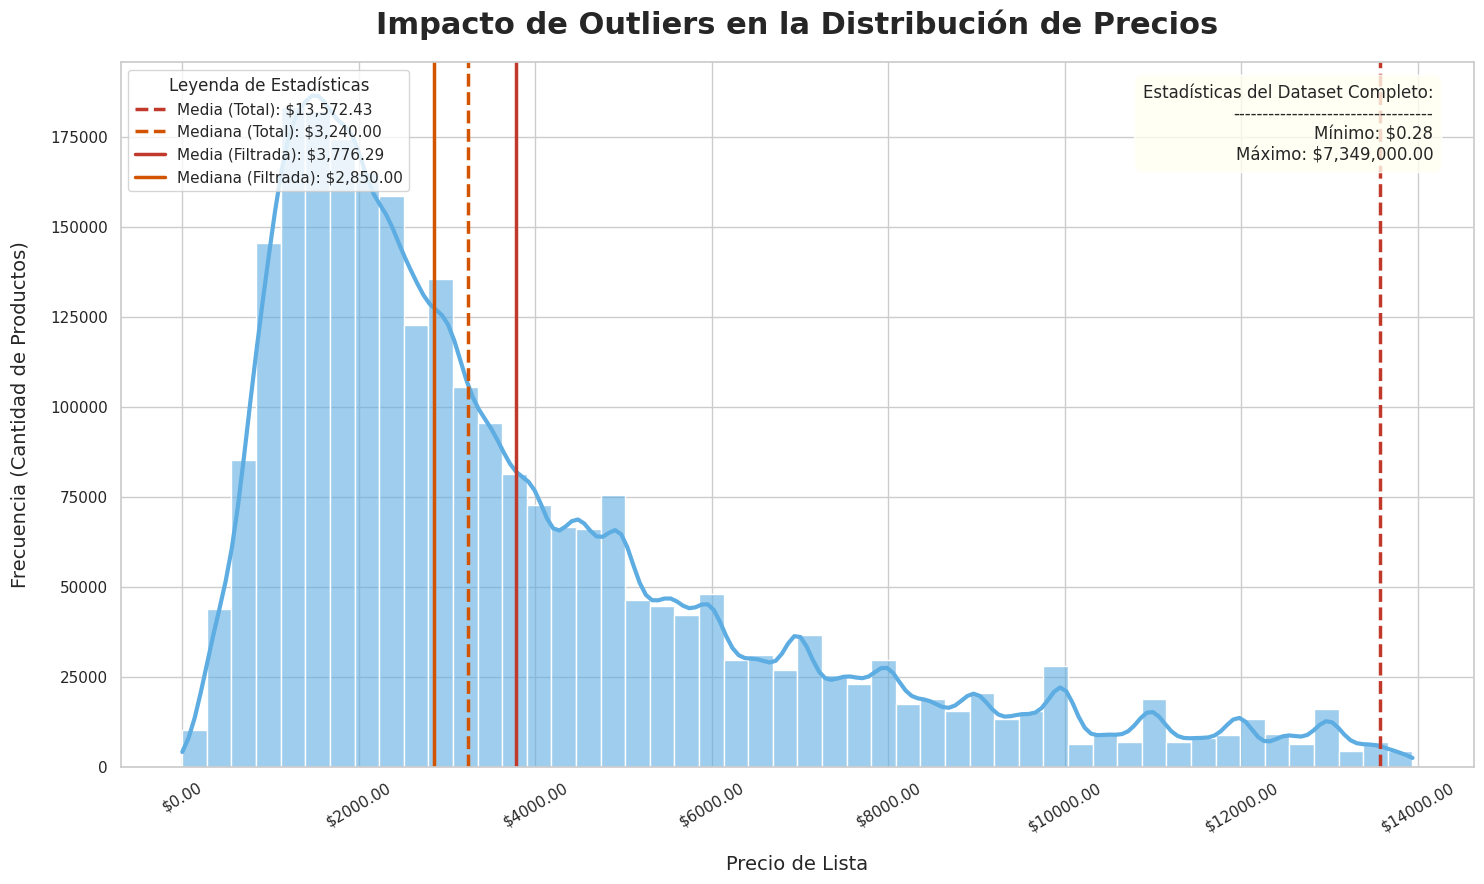

In [28]:
# 1. Definir la columna a graficar y analizar
columna_precio = 'productos_precio_lista'

# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="rocket")
plt.figure(figsize=(15, 9))

# 3. Graficar el histograma de los datos SIN outliers
ax = sns.histplot(
    data=producto_sin_outliers,
    x=columna_precio,
    bins=50,
    kde=True,
    color='#5dade2', # <-- ¡AQUÍ ESTÁ EL CAMBIO! Color celeste profesional
    alpha=0.6,
    line_kws={'linewidth': 3, 'color': '#2c3e50'}
)

# 4. Calcular y añadir las 4 líneas estadísticas
# --- Estadísticas del DataFrame COMPLETO (con outliers) ---
media_total = producto[columna_precio].mean()
mediana_total = producto[columna_precio].median()
plt.axvline(media_total, color='#c0392b', linestyle='--', linewidth=2.5, label=f'Media (Total): ${media_total:,.2f}')
plt.axvline(mediana_total, color='#d35400', linestyle='--', linewidth=2.5, label=f'Mediana (Total): ${mediana_total:,.2f}')

# --- Estadísticas del DataFrame FILTRADO (sin outliers) ---
media_filtrada = producto_sin_outliers[columna_precio].mean()
mediana_filtrada = producto_sin_outliers[columna_precio].median()
plt.axvline(media_filtrada, color='#c0392b', linestyle='-', linewidth=2.5, label=f'Media (Filtrada): ${media_filtrada:,.2f}')
plt.axvline(mediana_filtrada, color='#d35400', linestyle='-', linewidth=2.5, label=f'Mediana (Filtrada): ${mediana_filtrada:,.2f}')


# 5. Calcular Mín/Máx del DataFrame COMPLETO para el cuadro de texto
min_total = producto[columna_precio].min()
max_total = producto[columna_precio].max()
texto_estadisticas = (
    f"Estadísticas del Dataset Completo:\n"
    f"----------------------------------\n"
    f"Mínimo: ${min_total:,.2f}\n"
    f"Máximo: ${max_total:,.2f}"
)

# 6. Añadir el cuadro de texto
props = dict(boxstyle='round,pad=0.5', facecolor='ivory', alpha=0.8)
ax.text(0.97, 0.97, texto_estadisticas, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

# 7. Mejorar Títulos y Etiquetas
plt.title("Impacto de Outliers en la Distribución de Precios", fontsize=22, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=14, labelpad=15)
plt.ylabel("Frecuencia (Cantidad de Productos)", fontsize=14, labelpad=15)

# 8. Formatear el eje X para que parezca dinero
formatter = mticker.FormatStrFormatter('$%1.2f')
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=30)

# 9. Añadir una leyenda clara y bien ubicada
plt.legend(title='Leyenda de Estadísticas', fontsize=11, loc='upper left')

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR LA FIGURA EN UN ARCHIVO (antes de mostrarla)
plt.savefig('grafico_comparativo_precios.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico en pantalla
plt.show()

# --- FIN DEL CÓDIGO DEL GRÁFICO ---

### Top marcas

¿Cuáles son las marcas con mas productos?

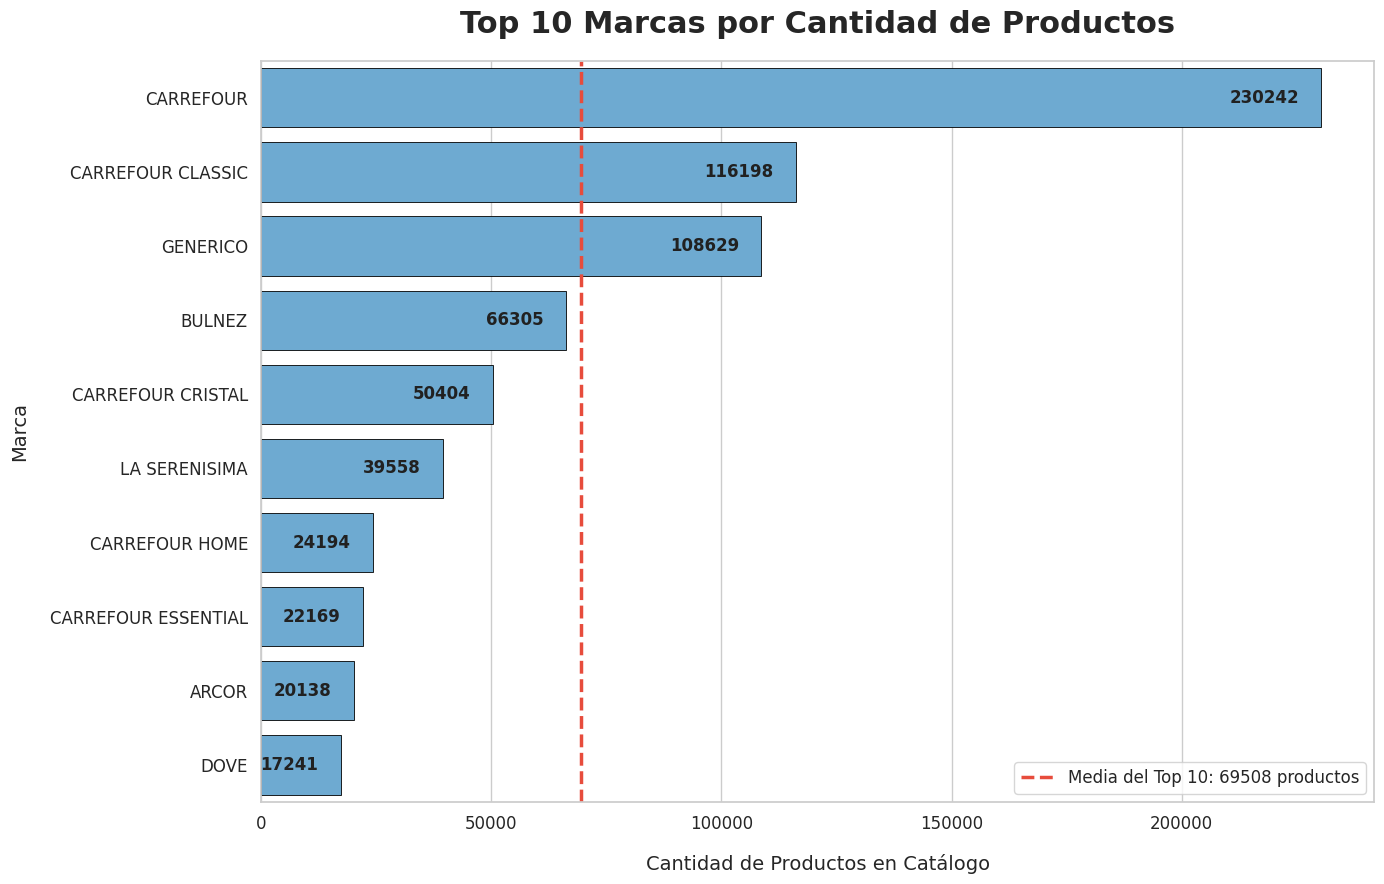

In [29]:
# 1. Preparar los datos
top_marcas = producto['productos_marca'].value_counts().head(10)

# 2. Calcular la media de productos para el Top 10 (la línea de referencia)
media_top10 = top_marcas.mean()

# 3. Establecer el tema y el tamaño de la figura
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 9))

# 4. Crear el gráfico de barras con el color celeste definido
ax = sns.barplot(
    x=top_marcas.values,
    y=top_marcas.index,
    color='#5dade2',  # <-- Color principal consistente con el gráfico anterior
    edgecolor='black',
    linewidth=0.6
)

# 5. Añadir la línea de la media con el color de acento rojo
ax.axvline(x=media_top10, color='#e74c3c', linestyle='--', linewidth=2.5,
            label=f'Media del Top 10: {media_top10:.0f} productos')

# 6. Añadir etiquetas de datos a las barras
#    Usaremos texto oscuro ya que el color de la barra es claro
for p in ax.patches:
    width = p.get_width()
    ax.text(width - (ax.get_xlim()[1] * 0.02), # Posición X (un 2% desde el borde)
            p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            ha='right',
            va='center',
            fontsize=12,
            color='#212121', # Un negro no tan intenso, muy legible
            weight='bold')

# 7. Títulos y Etiquetas con el mismo estilo profesional
plt.title("Top 10 Marcas por Cantidad de Productos", fontsize=22, pad=20, weight='bold')
plt.xlabel("Cantidad de Productos en Catálogo", fontsize=14, labelpad=15)
plt.ylabel("Marca", fontsize=14, labelpad=15)

# 8. Ajustar los ticks de los ejes para mejor legibilidad
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 9. Añadir la leyenda para explicar la línea roja
plt.legend(fontsize=12, loc='lower right') # Mover a la esquina inferior derecha

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR la figura en un archivo
plt.savefig('top_10_marcas_estilo_consistente.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico
plt.show()

# --- FIN DEL CÓDIGO DEL GRÁFICO ---

**¿Y si no consideramos a la marca Carrefour?**

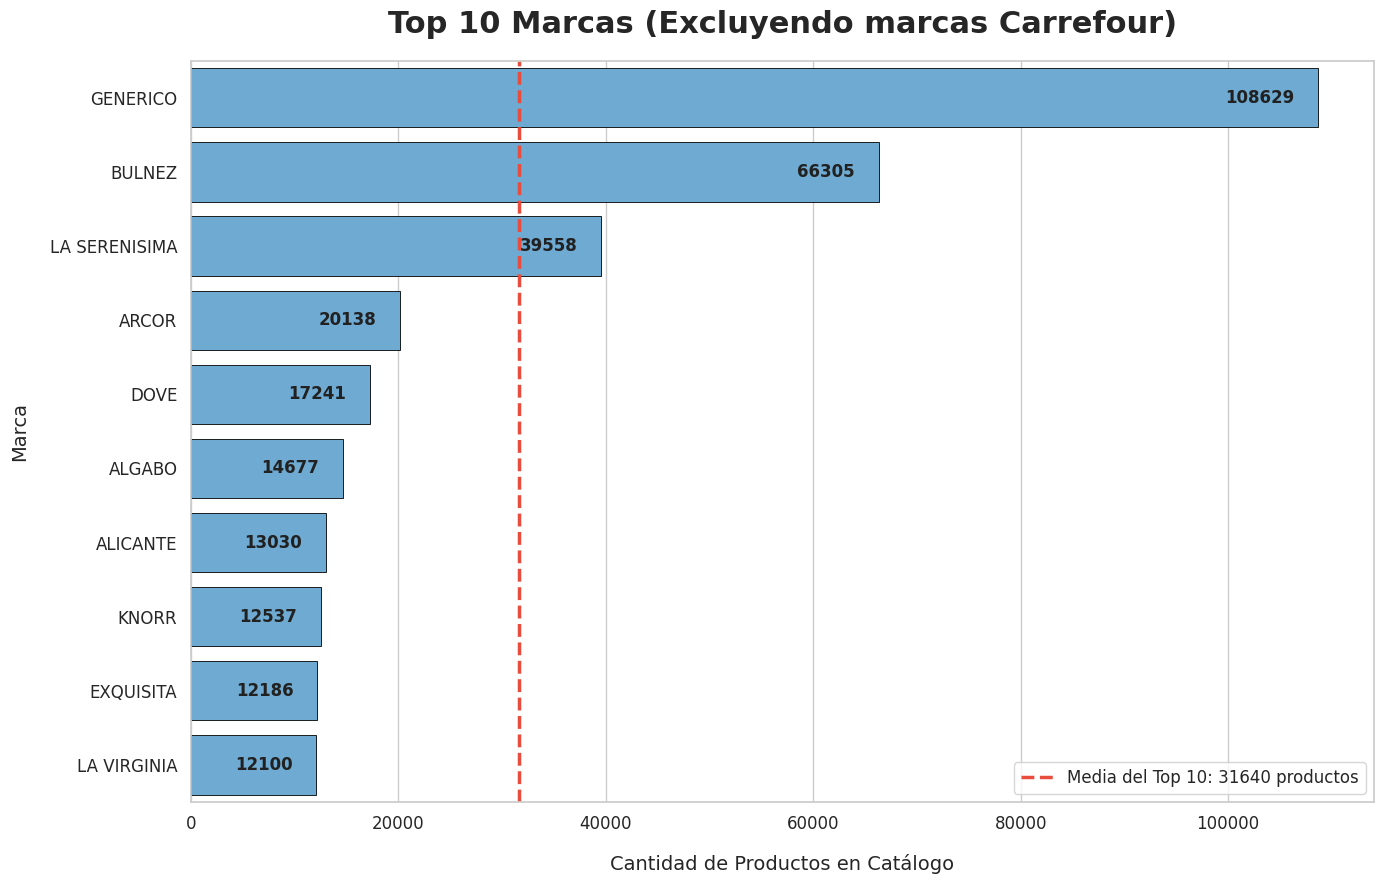

In [30]:


# --- INICIO DEL CÓDIGO ---

# 1. FILTRAR EL DATAFRAME
#    Crearemos un nuevo DataFrame llamado 'producto_filtrado'

# Condición 1: La marca NO debe ser 'S/D'.
filtro1 = producto['productos_marca'] != 'S/D'

# Condición 2: La marca NO debe contener 'CARREFOUR' (ignorando mayúsculas/minúsculas).
# El método .str.contains() es perfecto para esto.
# na=False asegura que los valores nulos (NaN) no den error y se traten como Falso.
filtro2 = ~producto['productos_marca'].str.contains('CARREFOUR', case=False, na=False)

# Aplicamos AMBOS filtros al DataFrame.
producto_filtrado = producto[filtro1 & filtro2]


# 2. PREPARAR LOS DATOS PARA EL GRÁFICO (usando el DataFrame filtrado)
top_marcas_filtrado = producto_filtrado['productos_marca'].value_counts().head(10)
media_top10_filtrado = top_marcas_filtrado.mean()


# 3. CREAR EL GRÁFICO (código idéntico en estilo al anterior)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 9))

ax = sns.barplot(
    x=top_marcas_filtrado.values,
    y=top_marcas_filtrado.index,
    color='#5dade2',
    edgecolor='black',
    linewidth=0.6
)

ax.axvline(x=media_top10_filtrado, color='#e74c3c', linestyle='--', linewidth=2.5,
            label=f'Media del Top 10: {media_top10_filtrado:.0f} productos')

for p in ax.patches:
    width = p.get_width()
    ax.text(width - (ax.get_xlim()[1] * 0.02),
            p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            ha='right',
            va='center',
            fontsize=12,
            color='#212121',
            weight='bold')

# Cambiamos el título para reflejar el filtrado
plt.title("Top 10 Marcas (Excluyendo marcas Carrefour)", fontsize=22, pad=20, weight='bold')
plt.xlabel("Cantidad de Productos en Catálogo", fontsize=14, labelpad=15)
plt.ylabel("Marca", fontsize=14, labelpad=15)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()

# GUARDAR con un nombre de archivo diferente
plt.savefig('top_10_marcas_filtrado_carrefour.png', dpi=300, bbox_inches='tight')

plt.show()

# --- FIN DEL CÓDIGO ---

**Comparativa de precios maximos y promedios entre las 10 sucursales con precios mas altos y las 10 con precios mas bajos**

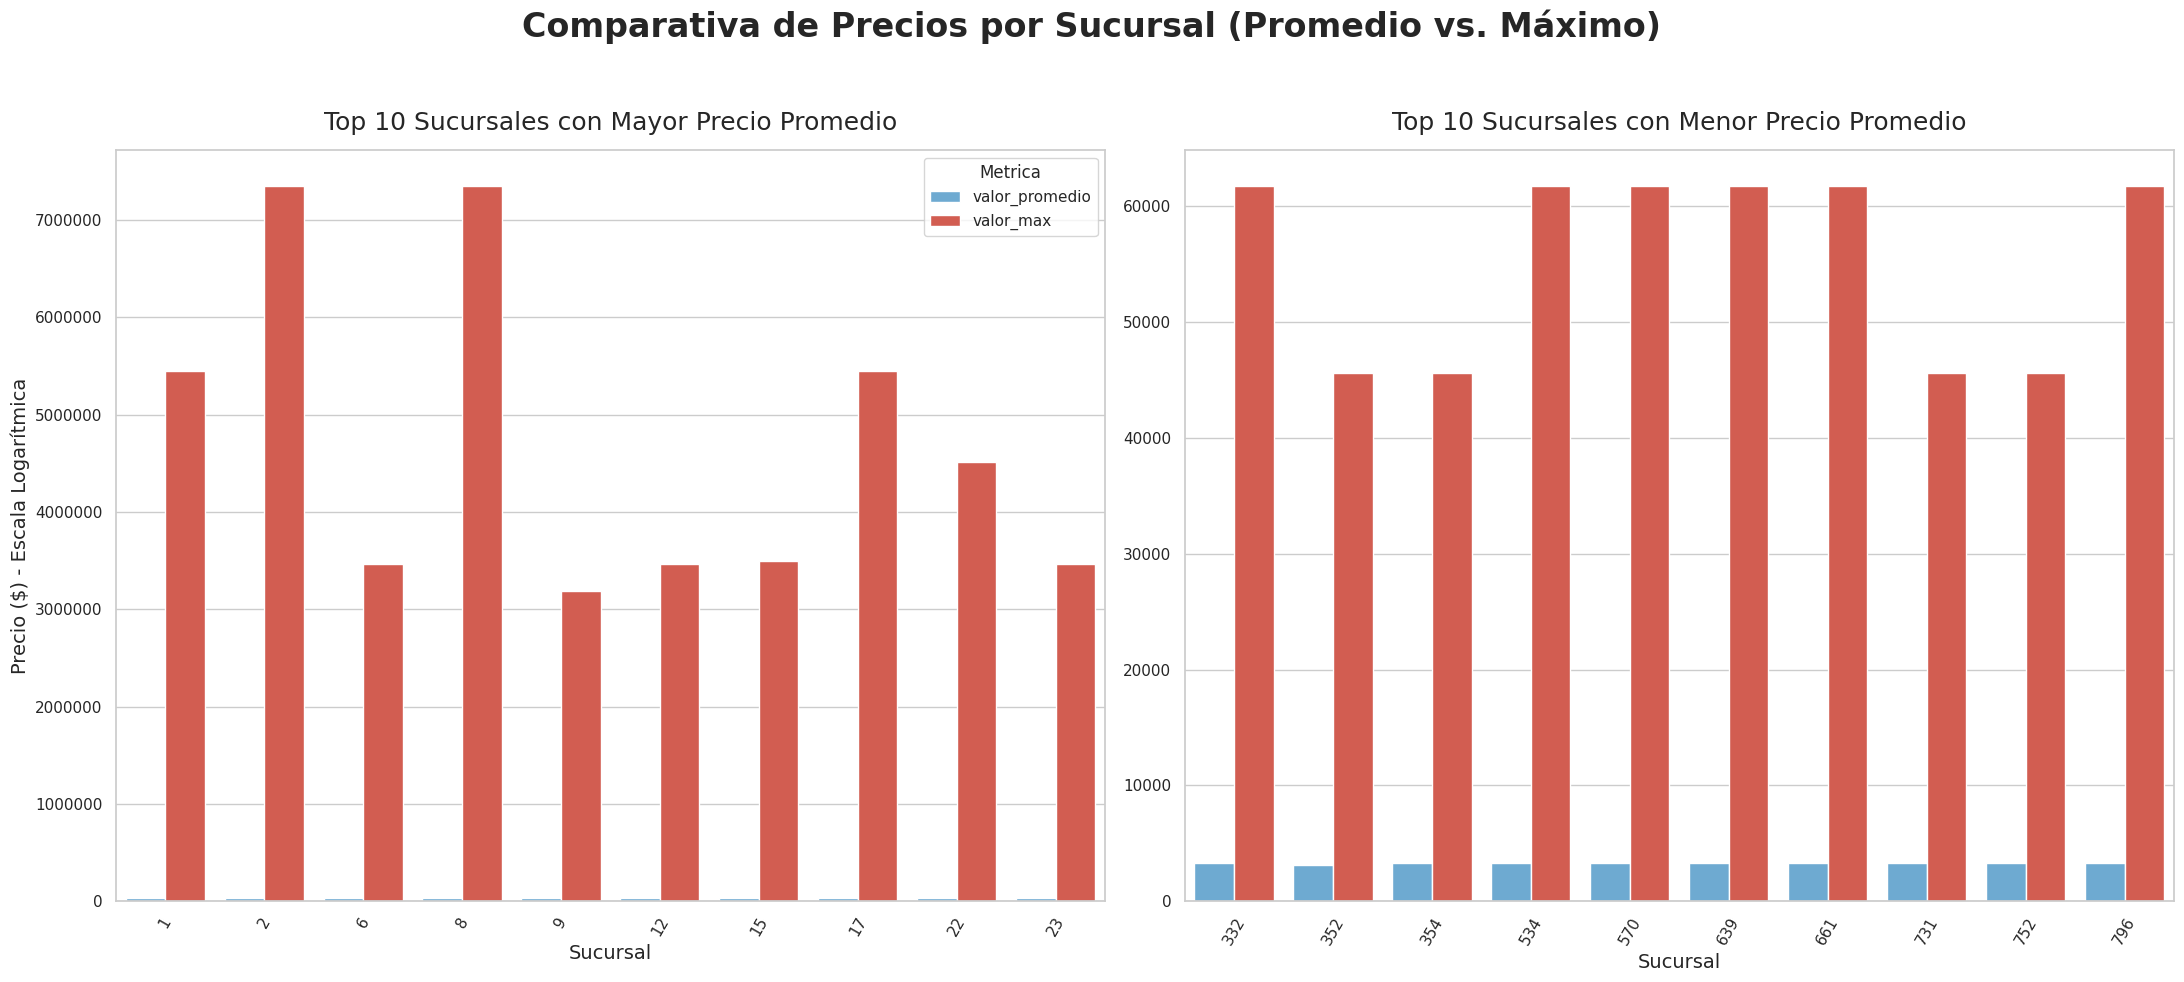

In [31]:
# Por sucursal:

# PASO 1: Agrupar por sucursal y calcular las estadísticas.
#print("Paso 1: Agrupando datos...")
sucursal_stats = producto.groupby('id_sucursal')['productos_precio_lista'].agg(
    valor_promedio='mean',
    valor_max='max'
).reset_index()


# PASO 2: Crear los dos DataFrames separados: Top 10 y Bottom 10.
#print("Paso 2: Creando los DataFrames Top 10 y Bottom 10...")
top_10_caros = sucursal_stats.nlargest(10, 'valor_promedio')
top_10_baratos = sucursal_stats.nsmallest(10, 'valor_promedio')


# PASO 3: Preparar los datos para un gráfico de barras agrupado.
# Usamos pd.melt() para transformar las columnas 'valor_promedio' y 'valor_max' en filas.
top_10_caros_long = pd.melt(top_10_caros, id_vars='id_sucursal', value_vars=['valor_promedio', 'valor_max'], var_name='Metrica', value_name='Precio')
top_10_baratos_long = pd.melt(top_10_baratos, id_vars='id_sucursal', value_vars=['valor_promedio', 'valor_max'], var_name='Metrica', value_name='Precio')


# PASO 4: Crear la figura con DOS subplots.
#print("Paso 3: Creando los gráficos...")
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
fig.suptitle("Comparativa de Precios por Sucursal (Promedio vs. Máximo)", fontsize=24, weight='bold')


# --- GRÁFICO IZQUIERDO: TOP 10 MÁS CARAS ---
ax_izq = axes[0]
sns.barplot(
    data=top_10_caros_long,
    x='id_sucursal',
    y='Precio',
    hue='Metrica', # Esto crea las barras agrupadas
    palette={'valor_promedio': '#5dade2', 'valor_max': '#e74c3c'},
    ax=ax_izq
)
ax_izq.set_title('Top 10 Sucursales con Mayor Precio Promedio', fontsize=18, pad=15)
ax_izq.set_xlabel('Sucursal', fontsize=14)
ax_izq.set_ylabel('Precio ($) - Escala Logarítmica', fontsize=14)


# --- GRÁFICO DERECHO: TOP 10 MÁS BARATAS ---
ax_der = axes[1]
sns.barplot(
    data=top_10_baratos_long,
    x='id_sucursal',
    y='Precio',
    hue='Metrica',
    palette={'valor_promedio': '#5dade2', 'valor_max': '#e74c3c'},
    ax=ax_der
)
ax_der.set_title('Top 10 Sucursales con Menor Precio Promedio', fontsize=18, pad=15)
ax_der.set_xlabel('Sucursal', fontsize=14)
ax_der.set_ylabel('') # No repetir la etiqueta del eje Y
ax_der.get_legend().remove() # Quitar leyenda duplicada


# --- !! LA SOLUCIÓN AL PROBLEMA DE ESCALA: ESCALA LOGARÍTMICA !! ---
# Aplicamos esto a AMBOS gráficos.
#ax_izq.set_yscale('log')
#ax_der.set_yscale('log')


# --- PASO 5: Mejoras finales y guardado ---

# Formatear el eje Y de ambos gráficos para que los números no estén en notación científica.
formatter = mticker.ScalarFormatter()
formatter.set_scientific(False)
ax_izq.yaxis.set_major_formatter(formatter)
ax_der.yaxis.set_major_formatter(formatter)

# Rotar las etiquetas del eje X en ambos gráficos para legibilidad.
ax_izq.tick_params(axis='x', rotation=60)
ax_der.tick_params(axis='x', rotation=60)

# Ajustar layout y guardar
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('grafico_barras_agrupado_final.png', dpi=300)
plt.show()



**Distribución de porcentajes de descuentos**

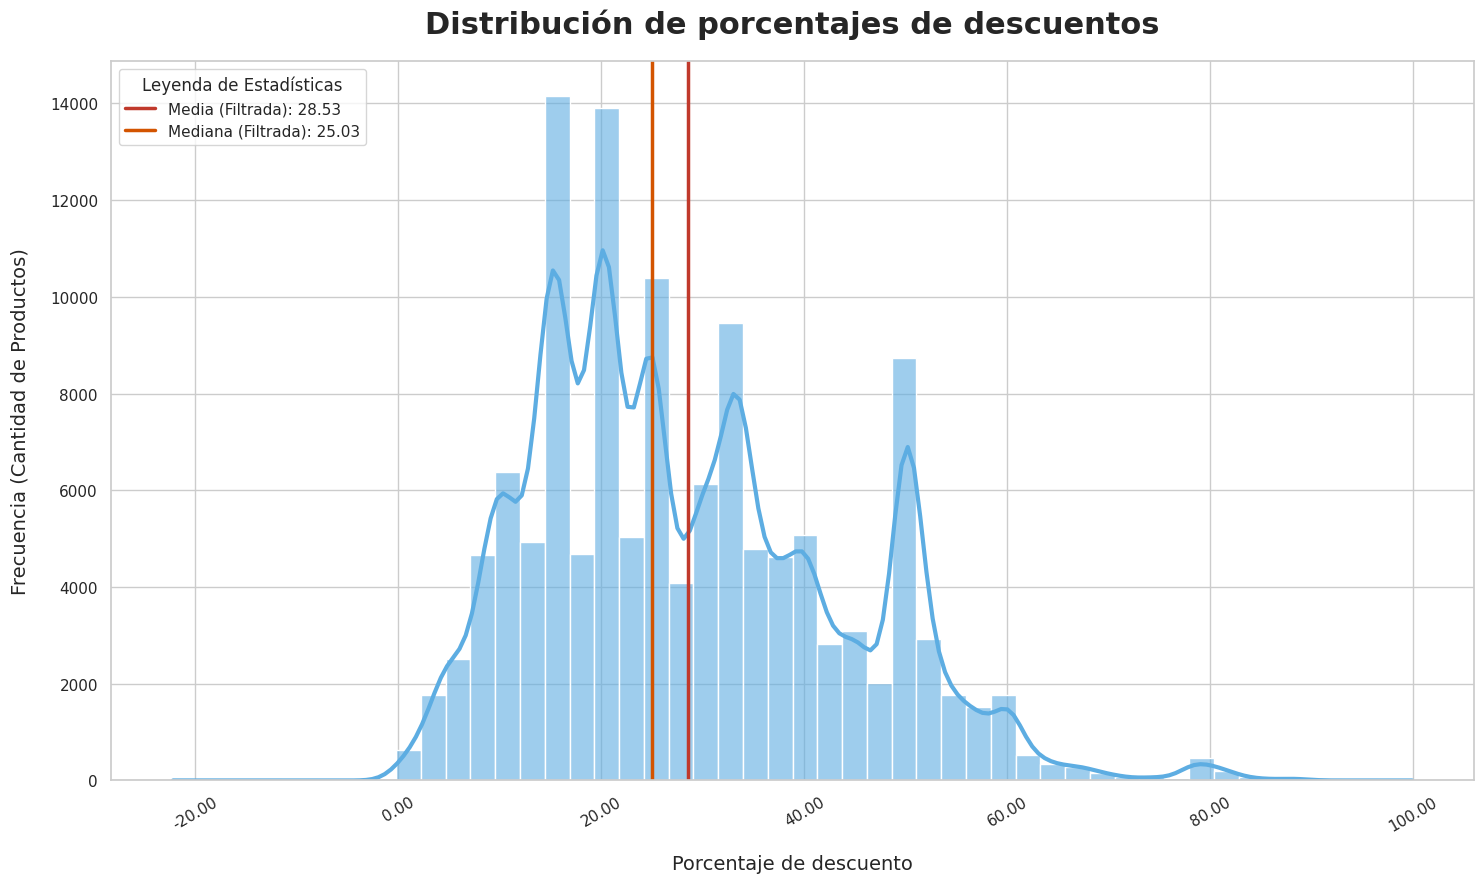

In [32]:


# 1. Definir la columna a graficar y analizar
columna_precio = 'descuento'

# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="rocket")
plt.figure(figsize=(15, 9))

# 3. Graficar el histograma de los datos SIN outliers
ax = sns.histplot(
    data=promociones,
    x=columna_precio,
    bins=50,
    kde=True,
    color='#5dade2', # <-- ¡AQUÍ ESTÁ EL CAMBIO! Color celeste profesional
    alpha=0.6,
    line_kws={'linewidth': 3, 'color': '#2c3e50'}
)

# --- Estadísticas del DataFrame FILTRADO (sin outliers) ---
media_filtrada = promociones[columna_precio].mean()
mediana_filtrada = promociones[columna_precio].median()
plt.axvline(media_filtrada, color='#c0392b', linestyle='-', linewidth=2.5, label=f'Media (Filtrada): {media_filtrada:,.2f}')
plt.axvline(mediana_filtrada, color='#d35400', linestyle='-', linewidth=2.5, label=f'Mediana (Filtrada): {mediana_filtrada:,.2f}')


# 5. Calcular Mín/Máx del DataFrame COMPLETO para el cuadro de texto
min_total = promociones[columna_precio].min()
max_total = promociones[columna_precio].max()
texto_estadisticas = (
    f"Estadísticas del Dataset Completo:\n"
    f"----------------------------------\n"
    f"Mínimo: {min_total:,.2f}\n"
    f"Máximo: {max_total:,.2f}"
)

# 6. Añadir el cuadro de texto
#props = dict(boxstyle='round,pad=0.5', facecolor='ivory', alpha=0.8)
#ax.text(0.97, 0.97, texto_estadisticas, transform=ax.transAxes, fontsize=12,
        #verticalalignment='top', horizontalalignment='right', bbox=props)

# 7. Mejorar Títulos y Etiquetas
plt.title("Distribución de porcentajes de descuentos", fontsize=22, pad=20, weight='bold')
plt.xlabel("Porcentaje de descuento", fontsize=14, labelpad=15)
plt.ylabel("Frecuencia (Cantidad de Productos)", fontsize=14, labelpad=15)

# 8. Formatear el eje X para que parezca dinero
formatter = mticker.FormatStrFormatter('%1.2f')
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=30)

# 9. Añadir una leyenda clara y bien ubicada
plt.legend(title='Leyenda de Estadísticas', fontsize=11, loc='upper left')

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR LA FIGURA EN UN ARCHIVO (antes de mostrarla)
plt.savefig('grafico_comparativo_precios.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico en pantalla
plt.show()

**Comparativa de distribucion de descuentos segun tipo de comercio (Express, Hiper y Market)**

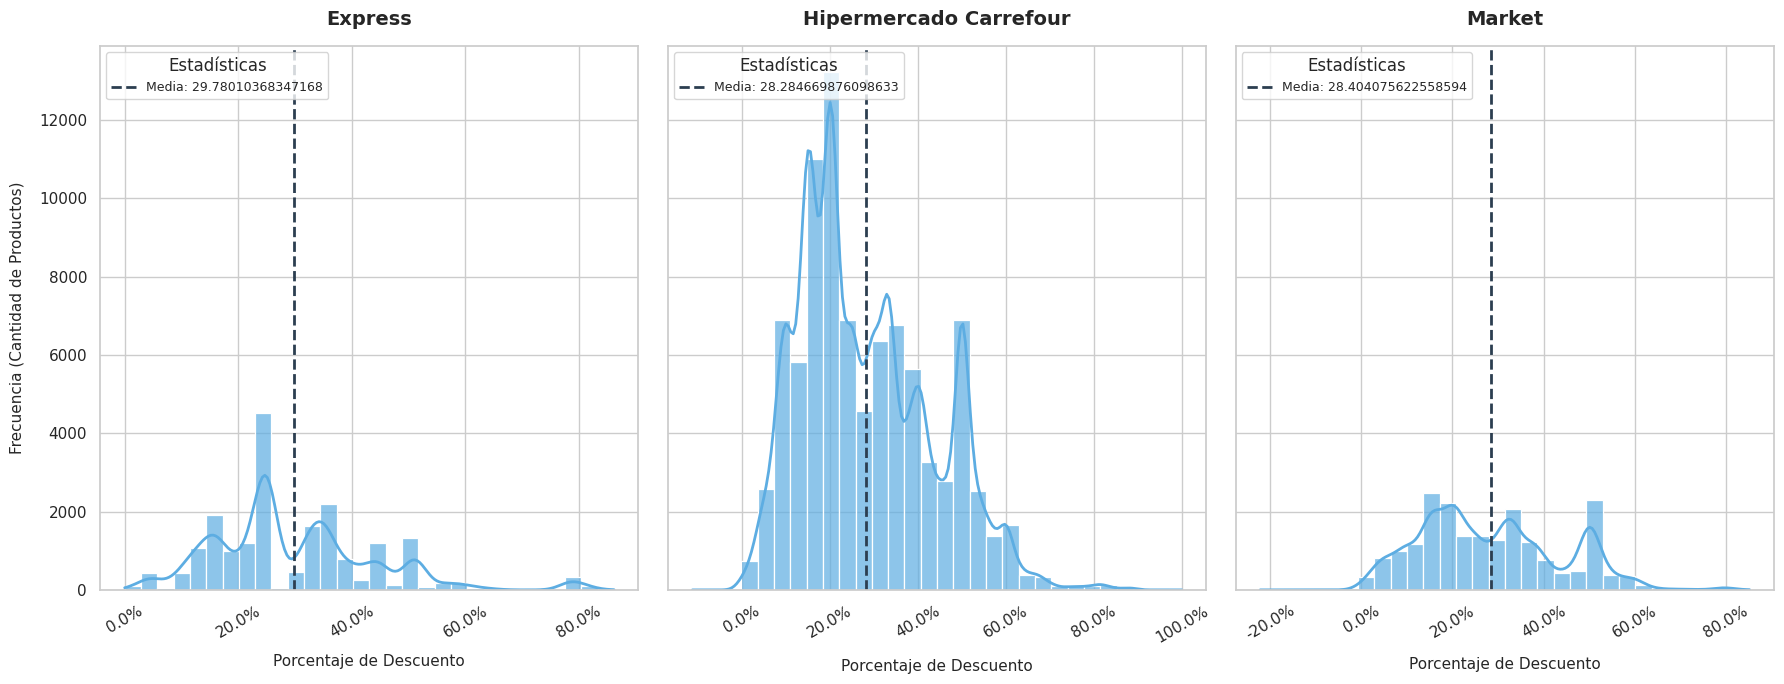

In [33]:

# 1. Definir las columnas a utilizar
columna_descuento = 'descuento'
columna_agrupacion = 'comercio_bandera_nombre'

# Limpieza y obtención de nombres únicos de banderas
if columna_agrupacion in df.columns:
    df[columna_agrupacion] = df[columna_agrupacion].str.strip()
    nombres_banderas_unicas = sorted(df[columna_agrupacion].dropna().unique())
else:
    print(f"Error: La columna '{columna_agrupacion}' no se encuentra en el DataFrame.")
    exit()

n_plots = len(nombres_banderas_unicas)
if n_plots == 0:
    print(f"No hay datos válidos en la columna '{columna_agrupacion}' para graficar.")
    exit()

# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(1, n_plots, figsize=(18, 7), sharey=True)

if n_plots == 1:
    axes = [axes]

# 3. Graficar en cada subplot
for i, nombre_bandera_actual in enumerate(nombres_banderas_unicas):
    data_filtrada = df[df[columna_agrupacion] == nombre_bandera_actual].copy()

    ax = axes[i]

    # Graficar el histograma y la curva KDE
    sns.histplot(
        data=data_filtrada,
        x=columna_descuento,
        bins=30,
        kde=True,
        color='#5dade2',
        alpha=0.7,
        line_kws={'linewidth': 2, 'color': '#2c3e50'},
        ax=ax
    )

    # Calcular la media de descuento para el grupo actual
    media_descuento = data_filtrada[columna_descuento].mean()

    # Formatear la media para mostrarla
    media_formateada = f"{media_descuento}" # Formato de porcentaje con un decimal

    # Añadir una línea vertical para indicar la media
    ax.axvline(media_descuento, color='#2c3e50', linestyle='--', linewidth=2, label=f'Media: {media_formateada}')

    # Títulos y Etiquetas
    ax.set_title(f"{nombre_bandera_actual}", fontsize=14, pad=15, weight='bold')
    ax.set_xlabel("Porcentaje de Descuento", fontsize=11, labelpad=10)
    if i == 0:
        ax.set_ylabel("Frecuencia (Cantidad de Productos)", fontsize=11, labelpad=10)
    else:
        ax.set_ylabel("")

    # Formatear el eje X
    formatter = mticker.FormatStrFormatter('%.1f%%')
    ax.xaxis.set_major_formatter(formatter)
    ax.tick_params(axis='x', rotation=30)

    # 9. Añadir la leyenda específica para la media del subplot actual
    # El parámetro 'label' en ax.axvline se usa para crear la entrada de la leyenda
    ax.legend(title='Estadísticas', fontsize=9, loc='upper left') # Añadir leyenda por subplot


# Ajustar el layout general
plt.tight_layout()

# Guardar la figura (opcional)
# plt.savefig('distribucion_descuentos_con_media_por_bandera.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

Si observamos la media de descuento, podemos ver que en los tres tipos de comercio, son practicamente iguales. Como es de esperarse, en el hipermercado hay muchos mas productos en descuento y tiene una distribucion un poco mas aguda con menos dispersion. En todos los mercados la distribución tiene forma que se parece mas o menos a una normal.

Podemos ver que en todos los casos, hay una barra un poco mas alta que los demas valores en 50 %.

**Distribución de descuentos por provincias**

In [34]:
df['sucursales_provincia'].unique()

<StringArray>
['AR-E', 'AR-B', 'AR-C', 'AR-Q', 'AR-U', 'AR-M', 'AR-Z', 'AR-S', 'AR-X',
 'AR-K', 'AR-H', 'AR-W', 'AR-R', 'AR-J', 'AR-A', 'AR-T', 'AR-F', 'AR-V',
 'AR-L', 'AR-P', 'AR-D', 'AR-Y']
Length: 22, dtype: string

In [35]:
# La columna sucursales_provincia tiene utiliza códigos como AR-E, AR-B para indicar la provincia a la que pertenece cada comercio.
# Haremos una transformacion según la norma ISO 3166-2 para recuperar los nombres de las provincias
# esto es solo a modo de facilitar la interpretacion y la curiosidad del lector, pero no es importante desde el punto de vista informativo para la realización del modelo


mapeo_provincia_df = pd.DataFrame({
    'sucursales_provincia': ['AR-A', 'AR-B', 'AR-C', 'AR-D', 'AR-E', 'AR-F', 'AR-G', 'AR-H',
                             'AR-J', 'AR-K', 'AR-L', 'AR-M', 'AR-N', 'AR-O', 'AR-P', 'AR-Q',
                             'AR-R', 'AR-S', 'AR-T', 'AR-U', 'AR-V', 'AR-X', 'AR-Y', 'AR-Z'],
    'nombre_provincia_completo': ['Salta', 'Buenos Aires', 'CABA', 'San Luis', 'Entre Ríos', 'Formosa', 'Santiago del Estero', 'Chaco',
                                  'Jujuy', 'Catamarca', 'La Pampa', 'Mendoza', 'Misiones', 'La Rioja', 'Misiones', 'Neuquén', # AR-P=Misiones
                                  'Río Negro', 'Santa Fe', 'Corrientes', 'Chubut', 'Tierra del Fuego', 'Córdoba', 'Tucumán', 'Santa Cruz']
})

# Luego, fusionamos este mapeo con df:
df = df.merge(mapeo_provincia_df, on='sucursales_provincia', how='left')


columna_agrupacion = 'nombre_provincia_completo'


/tmp/ipython-input-186953596.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


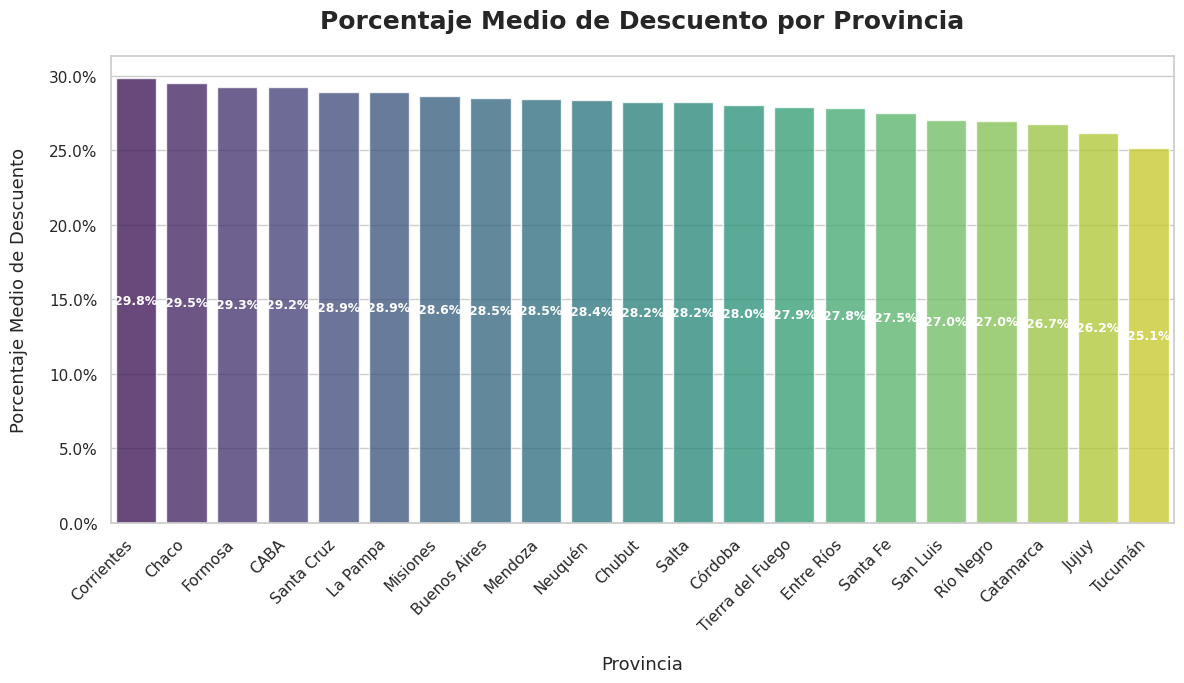

In [36]:


# 1. Definir las columnas relevantes
columna_descuento = 'descuento'
columna_agrupacion = 'nombre_provincia_completo'

# Limpieza de la columna de agrupación y obtención de las provincias únicas
if columna_agrupacion in df.columns:
    # Eliminar espacios en blanco alrededor de los nombres de provincia
    df[columna_agrupacion] = df[columna_agrupacion].str.strip()

    # Eliminar filas donde la provincia o el descuento sean NaN
    df_cleaned = df.dropna(subset=[columna_descuento, columna_agrupacion]).copy()

    # Obtener las provincias únicas y ordenarlas alfabéticamente
    provincias_unicas = sorted(df_cleaned[columna_agrupacion].unique())
else:
    print(f"Error: La columna '{columna_agrupacion}' no se encuentra en el DataFrame.")
    exit()

if not provincias_unicas:
    print(f"No hay datos válidos en la columna '{columna_agrupacion}' para graficar.")
    exit()

# 2. Agrupar por provincia y calcular la media de descuento
# Dado que el descuento ya va de 0 a 100, la media se calcula directamente.
df_media_por_provincia = df_cleaned.groupby(columna_agrupacion)[columna_descuento].mean().reset_index()

# Ordenar el resultado por la media de descuento para una mejor visualización
df_media_por_provincia = df_media_por_provincia.sort_values(by=columna_descuento, ascending=False)

# 3. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="viridis") # Cambié palette para que combine con el gráfico de barras
plt.figure(figsize=(12, 7))

# 4. Graficar el barplot usando los datos agrupados
ax = sns.barplot(
    data=df_media_por_provincia,
    x=columna_agrupacion,
    y=columna_descuento,
    order=df_media_por_provincia[columna_agrupacion],
    palette="viridis",
    alpha=0.8,
    errorbar=None
)

# 5. Añadir Títulos y Etiquetas
plt.title("Porcentaje Medio de Descuento por Provincia", fontsize=18, pad=20, weight='bold')
plt.xlabel("Provincia", fontsize=13, labelpad=15)
plt.ylabel("Porcentaje Medio de Descuento", fontsize=13, labelpad=15)

# 6. Formatear el eje Y para que muestre porcentajes correctamente (0-100)
# Usamos FuncFormatter para mayor control, ya que el Label es directamente el valor
formatter = mticker.FuncFormatter(lambda y, _: '{:.1f}%'.format(y))
ax.yaxis.set_major_formatter(formatter)

# Rotar las etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=11)

# 7. Añadir los valores de la media encima de cada barra
for container in ax.containers:
    # Formatear la altura de la barra como porcentaje con un decimal
    labels = [f'{h.get_height():.1f}%' for h in container.get_children()]
    ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=9, weight='bold')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

No es tan visible una diferencia entre porcentajes de descuentos promedio entre provincias.

**Scatter plot entre precio de lista y porcentaje de descuento**

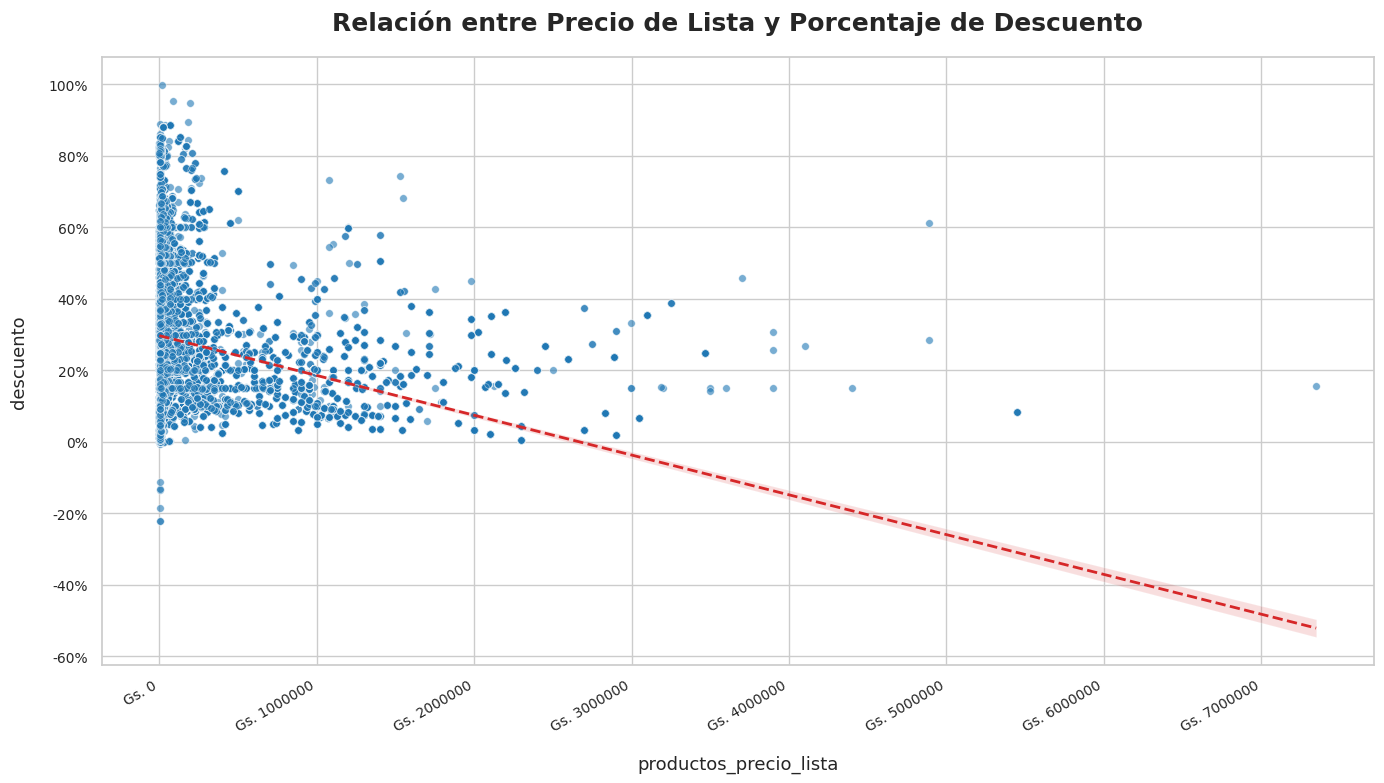

In [37]:


# 1. Definir las columnas para el scatter plot
columna_precio = 'productos_precio_lista'
columna_descuento = 'descuento'


df_plot = df.dropna(subset=[columna_precio, columna_descuento]).copy()


# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="viridis") # Un palette agradable para los puntos
plt.figure(figsize=(14, 8))

# 3. Crear el scatter plot
# Usamos scatterplot de seaborn, que permite más opciones que matplotlib.pyplot.scatter
ax = sns.scatterplot(
    data=df_plot,
    x=columna_precio,
    y=columna_descuento,
    alpha=0.6,       # Transparencia para ver densidad de puntos
    s=30,            # Tamaño de los puntos
    color='#1f77b4', # Un color azul consistente (puedes cambiarlo o usar palette)
    edgecolor='w',   # Borde blanco para los puntos
    linewidth=0.5
)

# 4. Títulos y Etiquetas
plt.title("Relación entre Precio de Lista y Porcentaje de Descuento", fontsize=18, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=13, labelpad=15)
plt.ylabel("Porcentaje de Descuento", fontsize=13, labelpad=15)

# 5. Formatear los ejes para mejor legibilidad
# Formato de moneda para el eje X (Precio de Lista)
# Puedes ajustar el símbolo y el formato según tus necesidades (ej: '$' o '€')
price_formatter = mticker.FormatStrFormatter('Gs. %.0f') # Si los precios son enteros, '%.0f'
ax.xaxis.set_major_formatter(price_formatter)

# Formato de porcentaje para el eje Y (Descuento)
discount_formatter = mticker.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)) # Sin decimales si es 0-100
ax.yaxis.set_major_formatter(discount_formatter)

# Rotar etiquetas del eje X si es necesario (raro para precios, pero puede ser útil)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)


# 6. Añadir una línea de regresión (opcional pero muy útil para scatter plots)
# Esto mostrará la tendencia lineal general entre las dos variables.
sns.regplot(
    data=df_plot,
    x=columna_precio,
    y=columna_descuento,
    scatter=False, # No queremos que regplot dibuje los puntos de nuevo
    color='#d62728', # Color para la línea de regresión
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# 7. Añadir una pequeña leyenda para la línea de regresión (si se añadió)
# Si el regplot no genera una leyenda automáticamente, puedes añadirla manualmente
# ax.plot([], [], color='#d62728', linestyle='--', linewidth=2, label='Tendencia Lineal')
# ax.legend(title='Tendencia', loc='upper left', fontsize=10)


# 8. Ajustar el layout
plt.tight_layout()

# 9. Mostrar el gráfico
plt.show()

No vemos una tendencia marcada en la relacion entre porcentaje de descuento y precio de lista (al menos graficando todos los valores).

A continuacion veremos el mismo gráfico pero para valores menores al Límite superior 13939 considerando el rango calculado mas arriba.

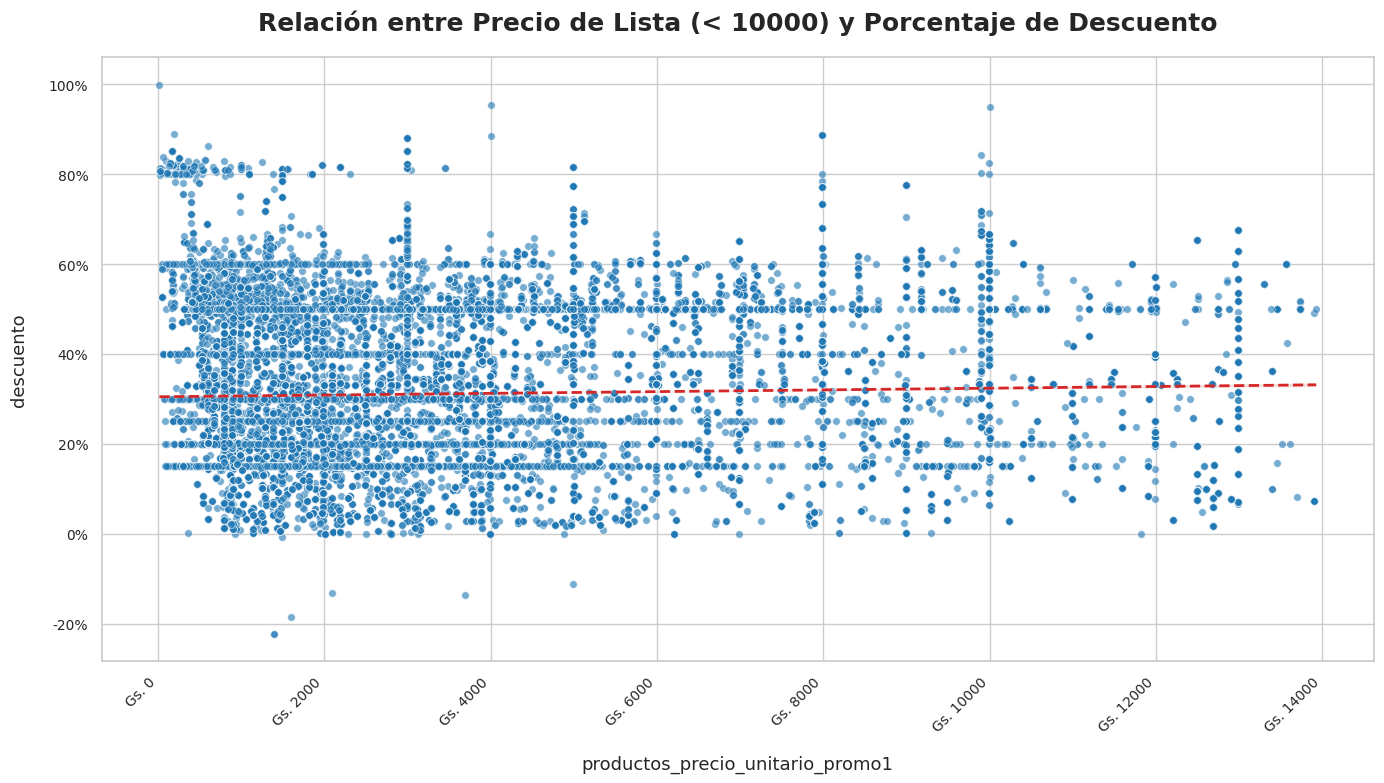

In [38]:


# 1. Definir las columnas
columna_precio = 'productos_precio_unitario_promo1'
columna_descuento = 'descuento'

# Verificar que las columnas existan
if columna_precio not in df.columns or columna_descuento not in df.columns:
    print(f"Error: Una o ambas columnas ('{columna_precio}', '{columna_descuento}') no se encuentran en el DataFrame.")
    exit()

# 2. Filtrar el DataFrame para incluir solo precios menores a 10000
# Usamos .loc para una selección basada en la condición
df_filtrado_precio = df.loc[df[columna_precio] < 13939].copy()

# Limpiar datos del DataFrame filtrado (eliminar NaN en las columnas de interés)
df_filtrado_precio = df_filtrado_precio.dropna(subset=[columna_precio, columna_descuento]).copy()

# Verificar si quedan datos después del filtrado
if df_filtrado_precio.empty:
    print("No hay datos con precios menores a 10000 para graficar después de limpiar NaN.")
    exit()

# 3. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="viridis")
plt.figure(figsize=(14, 8))

# 4. Crear el scatter plot con los datos filtrados
ax = sns.scatterplot(
    data=df_filtrado_precio, # Usamos el DataFrame filtrado
    x=columna_precio,
    y=columna_descuento,
    alpha=0.6,
    s=30,
    color='#1f77b4',
    edgecolor='w',
    linewidth=0.5
)

# 5. Títulos y Etiquetas
plt.title("Relación entre Precio de Lista (< 10000) y Porcentaje de Descuento", fontsize=18, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=13, labelpad=15)
plt.ylabel("Porcentaje de Descuento", fontsize=13, labelpad=15)

# 6. Formatear los ejes
# Eje X (Precio de Lista): Formato de moneda, sin decimales.
price_formatter = mticker.FormatStrFormatter('Gs. %.0f')
ax.xaxis.set_major_formatter(price_formatter)

# Eje Y (Descuento): Formato de porcentaje.
discount_formatter = mticker.FuncFormatter(lambda y, _: '{:.0f}%'.format(y))
ax.yaxis.set_major_formatter(discount_formatter)

# Rotar etiquetas del eje X si es necesario
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# 7. Añadir una línea de regresión (opcional pero útil)
# NOTA: La línea de regresión se calculará y mostrará SOLO para los datos filtrados (< 10000)
sns.regplot(
    data=df_filtrado_precio, # Importante usar el DataFrame filtrado aquí también
    x=columna_precio,
    y=columna_descuento,
    scatter=False,
    color='#d62728',
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# 8. Ajustar el layout
plt.tight_layout()

# 9. Mostrar el gráfico
plt.show()

Puede verse que los porcentajes de descuentos suelen darse a valores redondos, por ejemplo 15, 20, 25, 30, 40, 50, 60, etc.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


In [40]:
import os

# Ruta al archivo actual
old_name = "promociones.pkl"
new_name = "df.pkl"

os.rename(old_name, new_name)
print("Archivo renombrado a:", new_name)


df = pd.read_pickle('df.pkl')
df

Archivo renombrado a: df.pkl


,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,descuento
49,1,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3.790000e+03,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,42.216358
111,1,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,<NA>,8590.0,8.590000e+03,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,53.550644
120,1,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,<NA>,9900.0,9.900000e+03,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,50.000000
195,3,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3.918600e+03,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001
218,1,157,7797087510340,AIRE SPLIT SURREY 3430W 553GFQ1201F,UNI,SURREY,1049000.0,1.049000e+06,1,UNI,950000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,9.437559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944298,1,50,7799058089107,MUSCULOSA JERSEY ESTAMPADA PP TEX DM,UNI,<NA>,14990.0,1.499000e+04,1,UNI,12990.00,Promo A valida desde el 10/04/2025 hasta 12/07...,13.342229
2944343,1,10,7798397480231,SOPORTE DEKKIN DE CELULAR P AUTO 2 EN 1,UNI,<NA>,14900.0,1.490000e+04,1,UNI,8940.00,Promo A valida desde el 24/06/2025 hasta 30/06...,40.000000
2944371,1,232,7798128000165,ALFAJOR MAICENA CACHAFAZ CAJA 6 X 76 GRM,UNI,CACHAFAZ,11215.0,2.459430e+04,456,GRM,9532.75,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001
2944388,1,241,0769602431024,MONOPATIN ELECTRICO E RUSH AZUL,UNI,<NA>,299000.0,2.990000e+05,1,UNI,224000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,25.083614


# Segunda Parte

El en esta parte se abordará los siguientes aspectos:

- Preprocesamiento y limpieza del dataset

- Feature engineering

- Reducción de dimensionalidad

### Realizar una limpieza general del dataset, eliminando o corrigiendo datos inconsistentes o irrelevantes.

In [41]:
df['productos_marca'] = df['productos_marca'].fillna('N/A')
df

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,descuento
49,1,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3.790000e+03,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,42.216358
111,1,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,N/A,8590.0,8.590000e+03,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,53.550644
120,1,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,N/A,9900.0,9.900000e+03,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,50.000000
195,3,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3.918600e+03,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001
218,1,157,7797087510340,AIRE SPLIT SURREY 3430W 553GFQ1201F,UNI,SURREY,1049000.0,1.049000e+06,1,UNI,950000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,9.437559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944298,1,50,7799058089107,MUSCULOSA JERSEY ESTAMPADA PP TEX DM,UNI,N/A,14990.0,1.499000e+04,1,UNI,12990.00,Promo A valida desde el 10/04/2025 hasta 12/07...,13.342229
2944343,1,10,7798397480231,SOPORTE DEKKIN DE CELULAR P AUTO 2 EN 1,UNI,N/A,14900.0,1.490000e+04,1,UNI,8940.00,Promo A valida desde el 24/06/2025 hasta 30/06...,40.000000
2944371,1,232,7798128000165,ALFAJOR MAICENA CACHAFAZ CAJA 6 X 76 GRM,UNI,CACHAFAZ,11215.0,2.459430e+04,456,GRM,9532.75,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001
2944388,1,241,0769602431024,MONOPATIN ELECTRICO E RUSH AZUL,UNI,N/A,299000.0,2.990000e+05,1,UNI,224000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,25.083614


In [42]:
#ahora veremos que cantidad de nulos tendremos en cada columna:
# --- La línea de código clave ---
conteo_nulos = df.isnull().sum()

# Imprimir el resultado
print("Conteo de valores nulos por columna:")
conteo_nulos

Conteo de valores nulos por columna:


,0
id_bandera,0
id_sucursal,0
id_producto,0
productos_descripcion,0
productos_unidad_medida_presentacion,0
productos_marca,0
productos_precio_lista,0
productos_precio_referencia,0
productos_cantidad_referencia,0
productos_unidad_medida_referencia,0


**Una aclaración a cerca de los valores 'N/A' de productos_marca.**

Dada la características del dataframe e interpretando un poco el negocio, suponemos que esos valores corresponden a marcas poco conocidas, con poca cantidad de productos, en fin, sin peso en el supermercado, por lo tanto, creemos que la manera correcta de tratarlos es imputando el valor 'N/A'.




Los datos ya estan limpios y el dataset tiene solo información relevante.

**Elección de las features:**

El dataframe tiene muchas caracteristicas y consideramos que elegir las que creemos mas representativas, mejorará el funcionamiento del modelo.





In [43]:
df.columns

Index(['id_bandera', 'id_sucursal', 'id_producto', 'productos_descripcion',
       'productos_unidad_medida_presentacion', 'productos_marca',
       'productos_precio_lista', 'productos_precio_referencia',
       'productos_cantidad_referencia', 'productos_unidad_medida_referencia',
       'productos_precio_unitario_promo1', 'productos_leyenda_promo1',
       'descuento'],
      dtype='object')

In [44]:
#columnas a elegir:

features = ['id_bandera', 'productos_marca',
       'productos_precio_lista',
       'descuento']


df = df[features].copy()
df

,id_bandera,productos_marca,productos_precio_lista,descuento
49,1,GENERICO,3790.0,42.216358
111,1,N/A,8590.0,53.550644
120,1,N/A,9900.0,50.000000
195,3,CHEETOS,1685.0,15.000001
218,1,SURREY,1049000.0,9.437559
...,...,...,...,...
2944298,1,N/A,14990.0,13.342229
2944343,1,N/A,14900.0,40.000000
2944371,1,CACHAFAZ,11215.0,15.000001
2944388,1,N/A,299000.0,25.083614




Por que **NO** elegimos estas features?:

principalmente porque son variables categóricas y para usarlas debemos usar one hot encoding, y al hacerlo, agregamos una alta dimensionalidad al dataframe.

- 'id_sucursal': son muchas sucursales, usar un onehot encoding para esto agregaria mucha informacion. Algo de la informacion a cerca de la sucursal, puede obtenerse del id_bandera. id_bandera tiene una cardinalidad mucho mas baja (ver descripcion de id_bandera del tp1).

- 'id_producto', 'productos_descripcion': son columnas con una cardinalidad extremadamente alta. al igual que como el caso anterior, creemos que la marca representa igualmente a los productos y tiene una cardinalidad bastante menor (una marca tiene muchos productos, pero generalmente la marca habla un poco del producto).

- 'productos_unidad_medida_presentacion', 'productos_precio_referencia', 'productos_cantidad_referencia', 'productos_unidad_medida_referencia': son datos irrelevantes para el objetivo del modelo.

- 'productos_precio_unitario_promo1': la eliminamos ya que en descuento tenemos informacion del porcentaje de descuento respecto al precio de lista. Recordar que 'descuento' = 100* (1- productos_precio_unitario_promo1/productos_precio_lista).



### Realizar el split del dataset (ej: train y test)


Primero deberemos separar entre las columnas features y la target:

In [45]:
df.columns

Index(['id_bandera', 'productos_marca', 'productos_precio_lista', 'descuento'], dtype='object')

In [46]:
y = df[['descuento']]
X = df.drop(columns=['descuento'])
#separar en train y test:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
    )

### Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas.

Ya se hizo un análisis con técnicas visuales en la primera parte.

Se encuentran ouliers en la columna precio (y todas las columnas relacionadas con precio) y en la columna descuento. Lo que queremos es encontrar predicciones en el **porcentaje** de descuento, los valores ouliers en precio ya se vio en el TP1 que no afectan al porcentaje de descuento, aun asi, los eliminamos.

Por otro lado, viendo el gráfico de descuento en función del precio de lista (ver primera parte), vemos que los descuentos mas agresivos (cercanos al 80 %) se dan para productos de bajo costo.

Por lo tanto consideramos que para que el comportamiento del modelo sea mas presiso, nos concentraremos en eliminar valores atipicos de descuentos.



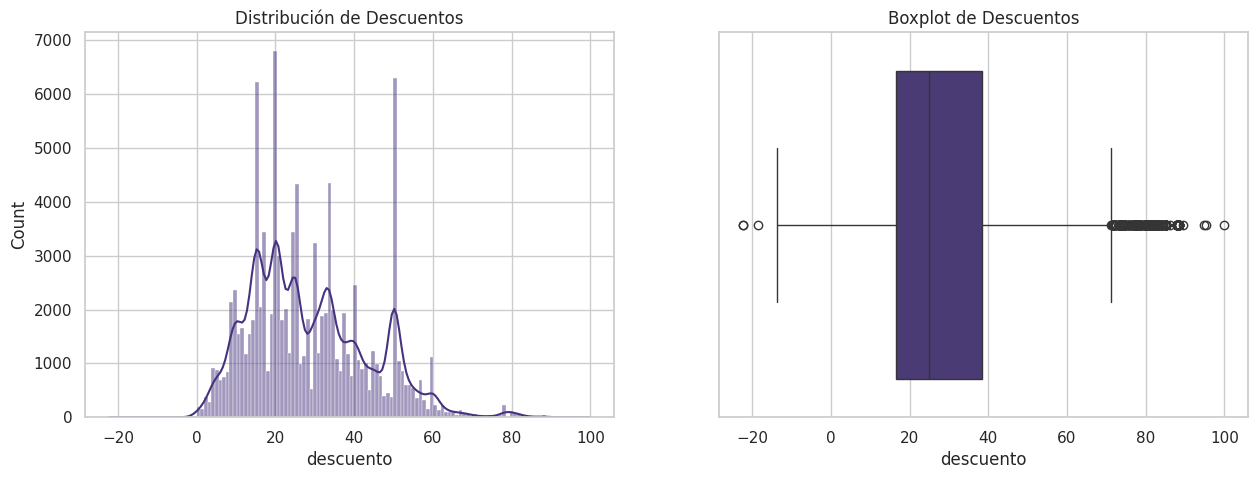

count    104107.000000
mean         28.522532
std          15.098023
min         -22.183407
25%          16.672224
50%          25.031290
75%          38.491146
max          99.874092
Name: descuento, dtype: float64


In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma y KDE (Estimación de Densidad de Kernel)
sns.histplot(y_train['descuento'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Descuentos')

# Boxplot
sns.boxplot(x=y_train['descuento'], ax=axes[1])
axes[1].set_title('Boxplot de Descuentos')

plt.show()

# También mira las estadísticas descriptivas
print(y_train['descuento'].describe())

In [48]:
X_train

,id_bandera,productos_marca,productos_precio_lista
1691133,1,AIWA,449000.0
266771,2,PALADINI,2199.0
2466552,1,N/A,99990.0
2554200,1,N/A,43000.0
2765889,1,N/A,39990.0
...,...,...,...
2898611,1,MAISTO,16990.0
2346001,1,CARREFOUR HOME,15990.0
19394,2,ELEGANTE,2545.0
359783,1,N/A,29990.0


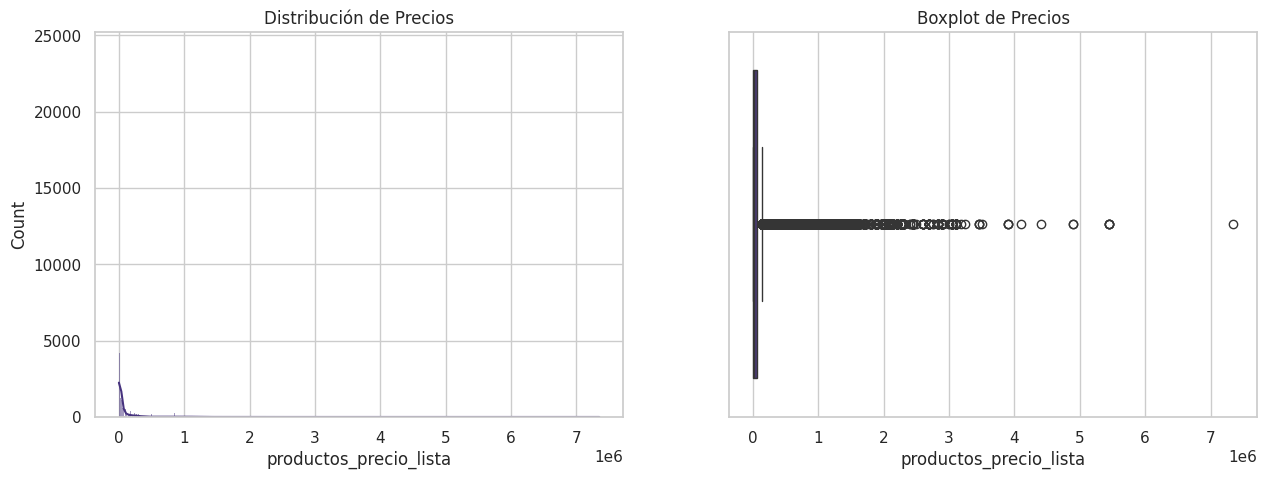

count    104107.000000
mean         28.522532
std          15.098023
min         -22.183407
25%          16.672224
50%          25.031290
75%          38.491146
max          99.874092
Name: descuento, dtype: float64


In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma y KDE (Estimación de Densidad de Kernel)
sns.histplot(X_train['productos_precio_lista'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Precios')

# Boxplot
sns.boxplot(x=X_train['productos_precio_lista'], ax=axes[1])
axes[1].set_title('Boxplot de Precios')

plt.show()

# También mira las estadísticas descriptivas
print(y_train['descuento'].describe())

La distribución del porcentaje de descuento tiene parecido aproximado a una normal, pero con algo de sesgo a la derecha. Ademas, tiene picos en algunos valores particulares de descuento como 20 %, 50 %, etc... Tambien ver que hay algunos valores con descuento negativo. Eso claramente es un error. Por otro lado, hay productos con descuento muy agresivo como por ejemplo 80 %. Seguramente (aunque podria indagarse un poco mas) eso corresponde a un 80 % de descuento en la segunda unidad y eso no es un descuento real por producto, sino un descuento llevando mas de una unidad.

La distribucion de precios es extremadamente dispersa, con la mayoria de precios menores a 20000.

Por eso, decidimos que la mejor estrategia es aplicar la técnica de la eliminación de valores ouliers con el método del rango intercuartil (sobre el método z score) con un valor k de 1.5 y con un limite inferior de 0.

--- Calculando límites en datos limpios ---
Q1 calculado sobre descuentos >= 0: 16.67
Q3 calculado sobre descuentos >= 0: 38.49
Límite inferior estadístico (Q1 - 1.5*IQR): -16.06

Límite inferior final (aplicando max(0, ...)): 0.00
Límite superior final (Q3 + 1.5*IQR): 71.22
----------------------------------------
--- Resultados del Filtrado ---
Tamaño original de X_train/y_train: 104107
Número de filas conservadas: 103356

Forma final de X_train: (103356, 3)
Forma final de y_train: (103356, 1)

y_train después de la limpieza:
         descuento
1691133  11.135858
266771    0.409277
2466552  40.004002
2554200  20.930233
2765889  62.515629
...            ...
2898611  41.200706
2346001  56.285179
19394    37.170921
359783   16.672224
2759401  16.387960

[103356 rows x 1 columns]

Generando visualizaciones del conjunto de entrenamiento limpio...


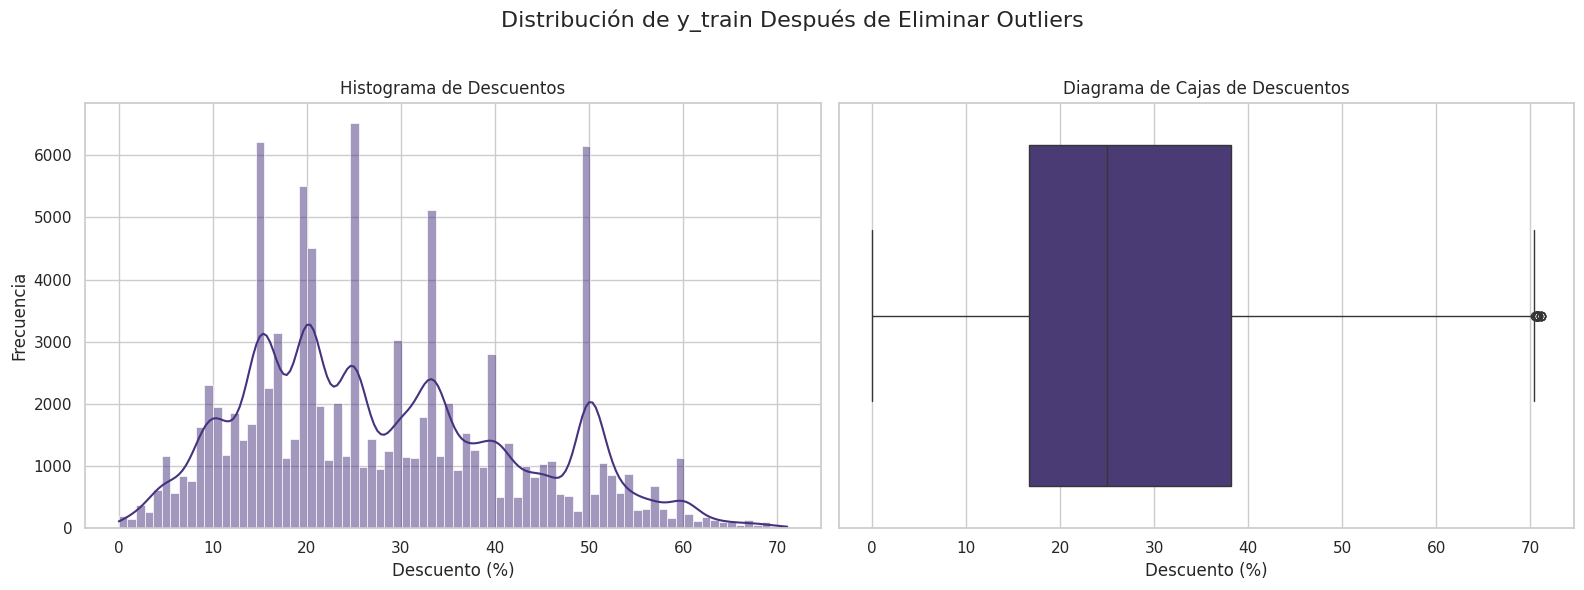

In [50]:
# --- 1. Filtrar descuentos negativos para el cálculo de cuartiles ---
# Creamos una Serie temporal SOLO con los valores válidos (>= 0) de y_train
# para CALCULAR los límites, no para filtrar todavía.
y_train_positivos = y_train[y_train['descuento'] >= 0]['descuento']

print("--- Calculando límites en datos limpios ---")
if y_train_positivos.empty:
    print("No hay descuentos no negativos para calcular los límites.")
else:
    # --- 2. Calcular Q1, Q3 e IQR sobre los datos limpios ---
    Q1 = y_train_positivos.quantile(0.25)
    Q3 = y_train_positivos.quantile(0.75)
    IQR = Q3 - Q1
    k = 1.5

    # --- 3. Calcular los límites finales para la eliminación (Lógica Mejorada) ---
    limite_inferior_estadistico = Q1 - k * IQR
    limite_inferior_final = max(0, limite_inferior_estadistico)
    limite_superior_final = Q3 + k * IQR

    print(f"Q1 calculado sobre descuentos >= 0: {Q1:.2f}")
    print(f"Q3 calculado sobre descuentos >= 0: {Q3:.2f}")
    print(f"Límite inferior estadístico (Q1 - 1.5*IQR): {limite_inferior_estadistico:.2f}")

    print(f"\nLímite inferior final (aplicando max(0, ...)): {limite_inferior_final:.2f}")
    print(f"Límite superior final (Q3 + 1.5*IQR): {limite_superior_final:.2f}")
    print("-" * 40)

    # --- 4. Identificar los índices a conservar en el DataFrame ORIGINAL ---
    indices_a_conservar = y_train[
        (y_train['descuento'] >= limite_inferior_final) &
        (y_train['descuento'] <= limite_superior_final)
    ].index

    # --- 5. Filtrar AMBOS, X_train e y_train, usando los índices ---
    X_train_final = X_train.loc[indices_a_conservar]
    y_train_final = y_train.loc[indices_a_conservar]

    print("--- Resultados del Filtrado ---")
    print(f"Tamaño original de X_train/y_train: {len(y_train)}")
    print(f"Número de filas conservadas: {len(indices_a_conservar)}")

    print("\nForma final de X_train:", X_train_final.shape)
    print("Forma final de y_train:", y_train_final.shape)

    print("\ny_train después de la limpieza:")
    print(y_train_final)

    # --- 6. VISUALIZAR EL RESULTADO (CON HISTOGRAMA Y BOXPLOT) ---
    # ¡Esta es la sección modificada!
    print("\nGenerando visualizaciones del conjunto de entrenamiento limpio...")

    # Creamos una figura con dos subplots, uno al lado del otro
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Distribución de y_train Después de Eliminar Outliers', fontsize=16)

    # Gráfico 1: Histograma y Distribución de Densidad (KDE)
    sns.histplot(data=y_train_final, x='descuento', kde=True, ax=axes[0])
    axes[0].set_title('Histograma de Descuentos')
    axes[0].set_xlabel('Descuento (%)')
    axes[0].set_ylabel('Frecuencia')

    # Gráfico 2: Diagrama de Cajas (Boxplot)
    sns.boxplot(data=y_train_final, x='descuento', ax=axes[1])
    axes[1].set_title('Diagrama de Cajas de Descuentos')
    axes[1].set_xlabel('Descuento (%)')

    # Ajustamos el layout para que todo se vea bien y mostramos la figura
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [51]:
X_train = X_train_final.copy()
y_train = y_train_final.copy()

Eliminacion de outliers de X_train

Q1 de 'productos_precio_lista': 2639.00
Q3 de 'productos_precio_lista': 57000.00
Límite inferior estadístico (Q1 - 1.5*IQR): -78902.50

Límite inferior final (aplicando max(0, ...)): 0.00
Límite superior final (Q3 + 1.5*IQR): 138541.50
----------------------------------------
--- Resultados del Filtrado ---
Tamaño original de X_train/y_train: 103356
Número de filas conservadas: 86557

Forma final de X_train: (86557, 3)
Forma final de y_train: (86557, 1)

Generando visualizaciones del conjunto de entrenamiento limpio...


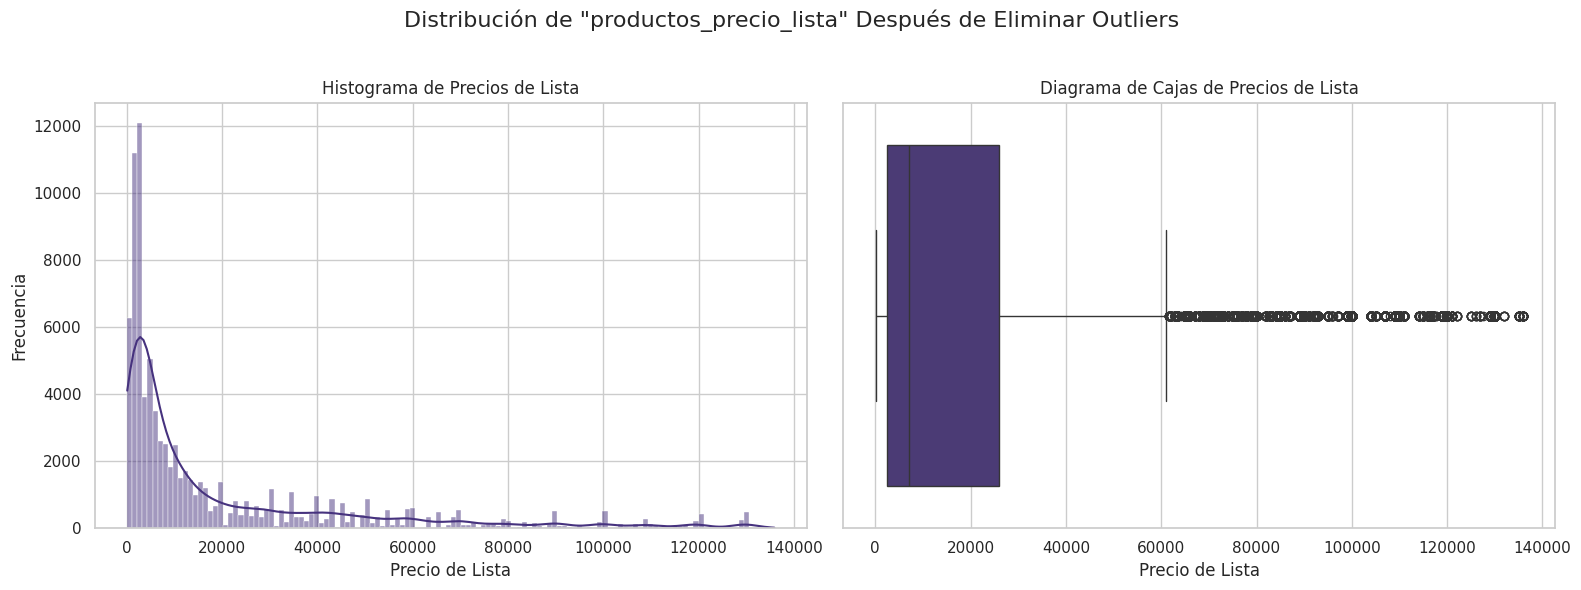

In [52]:


columna_a_limpiar = 'productos_precio_lista'
serie_precios = X_train[columna_a_limpiar]



# --- 2. Calcular Q1, Q3 e IQR ---
Q1 = serie_precios.quantile(0.25)
Q3 = serie_precios.quantile(0.75)
IQR = Q3 - Q1
k = 1.5

# --- 3. Calcular los límites finales para la eliminación ---
limite_inferior_estadistico = Q1 - k * IQR
# Aplicamos la regla de negocio: el precio no puede ser negativo.
limite_inferior_final = max(0, limite_inferior_estadistico)
limite_superior_final = Q3 + k * IQR

# Ahora los prints funcionarán porque Q1, Q3, etc., son números (floats)
print(f"Q1 de '{columna_a_limpiar}': {Q1:.2f}")
print(f"Q3 de '{columna_a_limpiar}': {Q3:.2f}")
print(f"Límite inferior estadístico (Q1 - 1.5*IQR): {limite_inferior_estadistico:.2f}")

print(f"\nLímite inferior final (aplicando max(0, ...)): {limite_inferior_final:.2f}")
print(f"Límite superior final (Q3 + 1.5*IQR): {limite_superior_final:.2f}")
print("-" * 40)

# --- 4. Identificar los índices a conservar en el DataFrame ORIGINAL ---
# La condición se aplica a la Serie, que es más simple y eficiente
indices_a_conservar = X_train[
    (X_train[columna_a_limpiar] >= limite_inferior_final) &
    (X_train[columna_a_limpiar] <= limite_superior_final)
].index

# --- 5. Filtrar AMBOS, X_train e y_train, usando los índices ---
# ¡ESTE ES EL PASO MÁS IMPORTANTE Y CORREGIDO!
X_train_final = X_train.loc[indices_a_conservar]
y_train_final = y_train.loc[indices_a_conservar]

print("--- Resultados del Filtrado ---")
print(f"Tamaño original de X_train/y_train: {len(y_train)}")
print(f"Número de filas conservadas: {len(indices_a_conservar)}")

print("\nForma final de X_train:", X_train_final.shape)
print("Forma final de y_train:", y_train_final.shape)

# --- 6. VISUALIZAR EL RESULTADO ---
# Usamos el DataFrame filtrado (X_train_final) para la visualización
print("\nGenerando visualizaciones del conjunto de entrenamiento limpio...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Distribución de "{columna_a_limpiar}" Después de Eliminar Outliers', fontsize=16)

# Gráfico 1: Histograma
sns.histplot(data=X_train_final, x=columna_a_limpiar, kde=True, ax=axes[0])
axes[0].set_title('Histograma de Precios de Lista')
axes[0].set_xlabel('Precio de Lista')
axes[0].set_ylabel('Frecuencia')

# Gráfico 2: Diagrama de Cajas
sns.boxplot(data=X_train_final, x=columna_a_limpiar, ax=axes[1])
axes[1].set_title('Diagrama de Cajas de Precios de Lista')
axes[1].set_xlabel('Precio de Lista')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [53]:
X_train = X_train_final.copy()
y_train = y_train_final.copy()

In [54]:
X_train

,id_bandera,productos_marca,productos_precio_lista
266771,2,PALADINI,2199.0
2466552,1,N/A,99990.0
2554200,1,N/A,43000.0
2765889,1,N/A,39990.0
1808333,2,CARREFOUR,4990.0
...,...,...,...
2898611,1,MAISTO,16990.0
2346001,1,CARREFOUR HOME,15990.0
19394,2,ELEGANTE,2545.0
359783,1,N/A,29990.0


### 1.5 Escalar y / o normalizar los features.

In [55]:
# --- 1. Crear e Instanciar el Escalador ---
# Usamos MinMaxScaler para escalar entre 0 y 1
scaler = MinMaxScaler()

# --- 2. Aprender los parámetros de X_train (el paso .fit()) ---
# Le pasamos la columna como un DataFrame (con doble corchete)
scaler.fit(X_train[['productos_precio_lista']])

# Puedes ver los parámetros que aprendió (el mínimo y el máximo)
print(f"Mínimo aprendido de 'productos_precio_lista' en X_train: {scaler.data_min_[0]:.2f}")
print(f"Máximo aprendido de 'productos_precio_lista' en X_train: {scaler.data_max_[0]:.2f}")
print("-" * 40)

# --- 3. Transformar los datos ---
# Creamos copias para evitar el SettingWithCopyWarning
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['productos_precio_lista'] = scaler.transform(X_train[['productos_precio_lista']])
X_test_scaled['productos_precio_lista'] = scaler.transform(X_test[['productos_precio_lista']])

# --- 4. Verificar el resultado ---
print("\n--- X_train DESPUÉS de escalar 'productos_precio_lista' ---")
print(X_train_scaled)
# Verás que el valor mínimo de la columna original (50) ahora es 0.0
# y el valor máximo (300) ahora es 1.0.

print("\n--- X_test DESPUÉS de escalar 'productos_precio_lista' ---")
print(X_test_scaled)

# Comprobemos que los valores en X_train_scaled están perfectamente entre 0 y 1.
print("\nVerificación en la columna escalada de X_train:")
print(f"Nuevo mínimo: {X_train_scaled['productos_precio_lista'].min():.2f}") # Debería ser 0.0
print(f"Nuevo máximo: {X_train_scaled['productos_precio_lista'].max():.2f}") # Debería ser 1.0

Mínimo aprendido de 'productos_precio_lista' en X_train: 109.00
Máximo aprendido de 'productos_precio_lista' en X_train: 135900.00
----------------------------------------

--- X_train DESPUÉS de escalar 'productos_precio_lista' ---
         id_bandera productos_marca  productos_precio_lista
266771            2        PALADINI                0.015391
2466552           1             N/A                0.735550
2554200           1             N/A                0.315860
2765889           1             N/A                0.293694
1808333           2       CARREFOUR                0.035945
...             ...             ...                     ...
2898611           1          MAISTO                0.124316
2346001           1  CARREFOUR HOME                0.116952
19394             2        ELEGANTE                0.017939
359783            1             N/A                0.220051
2759401           1           ADLER                0.021216

[86557 rows x 3 columns]

--- X_test DESPUÉS d

In [56]:
X_train = X_train_scaled.copy()
X_test  = X_test_scaled.copy()


## 2 Feature engineering

Durante la primera parte del trabajo se fueron haciendo algunas de las tareas propuestas dentro de feature engineering, asique esta parte en esta segunda parte del TP no se realizara.

### 2.1- Crear nuevos features en caso de ser necesario. Justificar.

En el tp1 se creo la variable descuento que es el porcentaje de descunto del producto:



$$
\text{descuento} = 100 \times \left( 1 - \frac{\text{precio\_promo}}{\text{precio\_lista}} \right)
$$






### 2.2- Aplicar técnicas de conversión de variables: codificación, discretización

Se aplicará one hot encoding para las variables categoricas:

In [57]:
X_train.columns

Index(['id_bandera', 'productos_marca', 'productos_precio_lista'], dtype='object')

In [58]:

# --- 1. Crear e Instanciar el OneHotEncoder ---
# Columnas que queremos codificar
columnas_categoricas = ['id_bandera', 'productos_marca']

# Creamos el encoder con parámetros importantes
ohe = OneHotEncoder(
    handle_unknown='ignore', # Ignora categorías en test que no estaban en train
    sparse_output=False,     # Devuelve un array de numpy denso (no una matriz dispersa)
    drop='first'             # Opcional, pero recomendado: elimina la primera categoría
)


# --- 2. Aprender las categorías de X_train (el paso .fit()) ---
# Le pasamos solo las columnas categóricas de X_train
ohe.fit(X_train[columnas_categoricas])


# --- 3. Transformar los datos ---
# Aplicamos la transformación a X_train y X_test
# El resultado es un array de NumPy, no un DataFrame
X_train_ohe_array = ohe.transform(X_train[columnas_categoricas])
X_test_ohe_array = ohe.transform(X_test[columnas_categoricas])


# --- 4. (Opcional pero recomendado) Crear un DataFrame con las nuevas columnas ---
# Obtenemos los nombres de las nuevas columnas generadas
nuevas_columnas_nombres = ohe.get_feature_names_out(columnas_categoricas)

# Convertimos los arrays a DataFrames con los nombres correctos
X_train_ohe_df = pd.DataFrame(X_train_ohe_array, index=X_train.index, columns=nuevas_columnas_nombres)
X_test_ohe_df = pd.DataFrame(X_test_ohe_array, index=X_test.index, columns=nuevas_columnas_nombres)


# --- 5. Unir las nuevas columnas con las originales (numéricas) ---
# Primero, quitamos las columnas categóricas originales de los dataframes
X_train_numerico = X_train.drop(columns=columnas_categoricas)
X_test_numerico = X_test.drop(columns=columnas_categoricas)

# Luego, concatenamos las columnas numéricas con las nuevas columnas codificadas
X_train_final = pd.concat([X_train_numerico, X_train_ohe_df], axis=1)
X_test_final = pd.concat([X_test_numerico, X_test_ohe_df], axis=1)


X_test_final.head()

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,productos_precio_lista,id_bandera_2.0,id_bandera_3.0,productos_marca_123 LISTO,productos_marca_1882,productos_marca_1888,productos_marca_1890,productos_marca_214 CARNE,productos_marca_3D,productos_marca_7 UP,...,productos_marca_XINKE,productos_marca_YER-VITA,productos_marca_YOGURADE,productos_marca_YOGURISIMO,productos_marca_YOVINESSA,productos_marca_YUKA,productos_marca_ZAFRAN,productos_marca_ZONA LIBRE,productos_marca_ZORRO,productos_marca_ZORRO PLUS
418174,1.832898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2717676,0.016275,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
978323,0.037123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1713271,0.006562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2257494,0.012453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
X_test = X_test_final.copy()
X_train = X_train_final.copy()

## 3 Reducción de dimensionalidad

### 3.1 Selección de features

Selección de features acelerada (sin fuga de datos)

En esta etapa se aplica un filtrado rápido para quedarnos con un subconjunto de variables informativas y estables, entrenando los criterios únicamente sobre X_train y aplicando exactamente la misma selección sobre X_test (mismas columnas), evitando data leakage. El flujo es:

1) Umbral de varianza en numéricas
Se descartan columnas numéricas casi constantes usando su varianza directa (sin estandarizar) con un umbral bajo (VAR_THRESH_NUM). Esto es O(1) por columna y muy rápido.

2) Filtro de rareza en dummies OHE
Para variables binarias se calcula su varianza teórica p·(1−p) (siendo p la frecuencia de 1s). Se eliminan dummies ultra raras con OHE_MIN_VAR, reduciendo drásticamente la dimensionalidad sin perder señal útil.

3) Ranking por relevancia respecto del target

Por defecto (rápido): se calcula la correlación de Pearson en valor absoluto de cada feature con el target de manera vectorizada (para OHE equivale al punto-biserial).

Opción alternativa (más costosa): USE_MI=True activa Mutual Information sobre una muestra de MI_SAMPLE filas y con n_neighbors=3 para acelerar, capturando relaciones no lineales.
Se toman las TOP_K columnas con mayor score.

4) Construcción de matrices finales
Con las columnas seleccionadas se arman X_train_sel y X_test_sel como matrices float32, manteniendo índices y el mismo orden de columnas.

Parámetros clave:
TOP_K (cantidad total a retener), VAR_THRESH_NUM (umbral de varianza en numéricas), OHE_MIN_VAR (rareza mínima en dummies), USE_MI (activar MI muestreada), MI_SAMPLE (tamaño de muestra para MI).

Resultado esperado:
Un conjunto compacto de features con buena señal predictiva y menor costo computacional, listo para modelos basados en árboles o boosting, sin incurrir en fuga de datos.

In [60]:
# Selección de features acelerada: VT + filtro de rareza en OHE + ranking por correlación vectorizada (opcional MI muestreada)

import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression  # sólo si USE_MI=True

t0 = time.time()

# ------------ Parámetros rápidos ------------
TOP_K = 900                 # cantidad total a retener (num + OHE)
VAR_THRESH_NUM = 1e-6       # umbral de varianza para numéricas (sin escalar)
OHE_MIN_VAR = 1e-6          # p*(1-p) mínimo para conservar una dummy (sube velocidad mucho)
USE_MI = False              # dejar en False para máxima velocidad; True usa MI sobre muestra
MI_SAMPLE = 30000           # filas para MI si USE_MI=True
MI_NEIGHBORS = 3            # vecinos para MI (más rápido que el default)

# ------------ Utilidades ------------
def detect_ohe_columns(df: pd.DataFrame, cat_bases):
    prefixes = tuple(f"{c}_" for c in cat_bases)
    # sólo columnas numéricas que además empiezan por los prefijos OHE
    num_all = df.select_dtypes(include=[np.number]).columns
    return [c for c in num_all if c.startswith(prefixes)]

def fast_abs_corr(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Correlación de Pearson |r| vectorizada columna a columna, sin centrar explícitamente X."""
    # y centrado/escala
    y = y.astype(np.float32, copy=False)
    y_mean = y.mean()
    y_ctr = y - y_mean
    y_ss = np.sqrt((y_ctr**2).sum())
    # estadísticos por columna
    n = X.shape[0]
    x_mean = X.mean(axis=0)
    x_ss = np.sqrt(((X - x_mean)**2).sum(axis=0))
    # numerador: (X - mean_X)^T (y - mean_y) = X^T y - mean_X * sum(y_ctr)
    num = X.T @ y_ctr - x_mean * y_ctr.sum()
    denom = x_ss * y_ss + 1e-12
    r = num / denom
    return np.abs(r)

# ------------ 1) Definición de conjuntos ------------
columnas_categoricas_base = ['id_bandera', 'productos_marca']

# y_train / y_test alineados
y_train = y.loc[X_train.index]
y_test  = y.loc[X_test.index]
y_train_1d = np.asarray(y_train, dtype=np.float32).ravel()
y_test_1d  = np.asarray(y_test,  dtype=np.float32).ravel()

# columnas numéricas y OHE (sólo numéricas)
num_all = X_train.select_dtypes(include=[np.number]).columns.tolist()
ohe_cols = detect_ohe_columns(X_train, columnas_categoricas_base)
num_cols = [c for c in num_all if c not in ohe_cols]

# ------------ 2) Umbral de varianza ------------
# NUMÉRICAS: varianza simple (más rápido que escalar + VT). Si hay pocas numéricas, esto es instantáneo.
if len(num_cols):
    Xtr_num = X_train[num_cols].to_numpy(dtype=np.float32, copy=False)
    var_num = Xtr_num.var(axis=0)
    keep_num_mask = var_num > VAR_THRESH_NUM
    num_cols_keep_var = [c for c, k in zip(num_cols, keep_num_mask) if k]
    Xtr_num_keep = X_train[num_cols_keep_var].to_numpy(dtype=np.float32, copy=False) if num_cols_keep_var else np.empty((len(X_train),0), np.float32)
    Xte_num_keep = X_test[num_cols_keep_var].to_numpy(dtype=np.float32, copy=False)  if num_cols_keep_var else np.empty((len(X_test),0),  np.float32)
else:
    num_cols_keep_var, Xtr_num_keep, Xte_num_keep = [], np.empty((len(X_train),0), np.float32), np.empty((len(X_test),0), np.float32)

# OHE: filtrar dummies ultra raras usando p*(1-p) (mucho más rápido que VT sobre arrays grandes)
if len(ohe_cols):
    Xtr_ohe = X_train[ohe_cols].to_numpy(dtype=np.float32, copy=False)
    p = Xtr_ohe.mean(axis=0)          # frecuencia de 1s
    var_ohe = p * (1.0 - p)
    keep_ohe_mask = var_ohe > OHE_MIN_VAR
    ohe_cols_keep_var = [c for c, k in zip(ohe_cols, keep_ohe_mask) if k]
    Xtr_ohe_keep = X_train[ohe_cols_keep_var].to_numpy(dtype=np.float32, copy=False) if ohe_cols_keep_var else np.empty((len(X_train),0), np.float32)
    Xte_ohe_keep = X_test[ohe_cols_keep_var].to_numpy(dtype=np.float32, copy=False)  if ohe_cols_keep_var else np.empty((len(X_test),0),  np.float32)
else:
    ohe_cols_keep_var, Xtr_ohe_keep, Xte_ohe_keep = [], np.empty((len(X_train),0), np.float32), np.empty((len(X_test),0), np.float32)

# ------------ 3) Ranking por relevancia (rápido) ------------
# Concatenar matrices retenidas
Xtr_keep = np.hstack([Xtr_num_keep, Xtr_ohe_keep]) if (Xtr_num_keep.shape[1] + Xtr_ohe_keep.shape[1]) else np.empty((len(X_train),0), np.float32)
colnames_keep = num_cols_keep_var + ohe_cols_keep_var

if Xtr_keep.shape[1] == 0:
    selected_cols_final = []
else:
    if USE_MI:
        # MI sobre una muestra para acelerar
        n = Xtr_keep.shape[0]
        m = min(MI_SAMPLE, n)
        idx = np.random.default_rng(42).choice(n, size=m, replace=False)
        mi = mutual_info_regression(Xtr_keep[idx], y_train_1d[idx], n_neighbors=MI_NEIGHBORS, random_state=42)
        scores = np.asarray(mi, dtype=np.float32)
    else:
        # |correlación| vectorizada (punto-biserial para OHE binaria equivale a Pearson)
        scores = fast_abs_corr(Xtr_keep, y_train_1d).astype(np.float32)

    # top-k más altos
    k = min(TOP_K, Xtr_keep.shape[1])
    top_idx = np.argpartition(-scores, kth=k-1)[:k]
    # ordenar por score descendente
    top_idx = top_idx[np.argsort(-scores[top_idx])]
    selected_cols_final = [colnames_keep[i] for i in top_idx]

# ------------ 4) Construcción de matrices finales ------------
if selected_cols_final:
    X_train_sel = X_train[selected_cols_final].to_numpy(dtype=np.float32, copy=False)
    X_test_sel  = X_test[selected_cols_final].to_numpy(dtype=np.float32, copy=False)
else:
    X_train_sel = np.empty((len(X_train),0), np.float32)
    X_test_sel  = np.empty((len(X_test),0),  np.float32)

# ------------ 5) Reporte ------------
print("=== Selección (FAST) ===")
print(f"- Numéricas candidatas: {len(num_cols)} | OHE candidatas: {len(ohe_cols)}")
print(f"- Tras varianza -> Num: {len(num_cols_keep_var)} | OHE: {len(ohe_cols_keep_var)}  (OHE_MIN_VAR={OHE_MIN_VAR})")
print(f"- Método ranking: {'MI muestreada' if USE_MI else 'correlación |r| vectorizada'}")
print(f"- TOP_K retenido: {len(selected_cols_final)}")
print(f"- Shape final: X_train_sel={X_train_sel.shape}, X_test_sel={X_test_sel.shape}")
print(f"Tiempo selección: {time.time()-t0:.2f}s")


=== Selección (FAST) ===
- Numéricas candidatas: 1 | OHE candidatas: 853
- Tras varianza -> Num: 1 | OHE: 853  (OHE_MIN_VAR=1e-06)
- Método ranking: correlación |r| vectorizada
- TOP_K retenido: 854
- Shape final: X_train_sel=(86557, 854), X_test_sel=(26027, 854)
Tiempo selección: 3.78s


####  Prefiltro anti-fuga para target = "descuento"

El objetivo es evitar variables que anticipen/elaboren el resultado. Se permiten precios de lista, pero se excluyen columnas de promociones, descuentos ya calculados, precios unitarios y “referencias”. Este bloque debe ir antes de detectar OHE/numéricas y de la selección

In [61]:
# === Prefiltro anti-fuga para target = "descuento" ===
# Se permiten precios de lista; se excluyen columnas de promo/discount/unitario/referencia.
import re

leak_re = re.compile(r"(promo|descuento|unitario|referencia)", re.IGNORECASE)

# Quitar columnas con fuga de X_train/X_test
cols_ban = [c for c in X_train.columns if leak_re.search(c)]
X_train = X_train.drop(columns=cols_ban, errors="ignore").copy()
X_test  = X_test.drop(columns=cols_ban,  errors="ignore").copy()

# Asegurar explícitamente que 'descuento' no quede como feature
for col in ["descuento", "descuento_pct"]:
    if col in X_train.columns:
        X_train = X_train.drop(columns=[col])
        X_test  = X_test.drop(columns=[col])

# Ahora sí: detectar OHE y numéricas sobre el set "seguro"
columnas_categoricas_base = ['id_bandera', 'productos_marca']
ohe_cols = detect_ohe_columns(X_train, columnas_categoricas_base)
num_cols = [c for c in X_train.columns if c not in ohe_cols]


Se decidió no aplicar extracción de características (PCA/SVD) antes de Random Forest por:

Adecuación del modelo: los árboles/Random Forest manejan bien alta dimensionalidad y variables OHE sin requerir decorrelación ni escalado.

Splits univariados: PCA/SVD mezclan señales en componentes; esto diluye la separabilidad 0/1 de las dummies que los árboles explotan mejor.

Criterio no supervisado: PCA/SVD maximizan varianza de
𝑋
X, no el poder predictivo respecto de
𝑦
y; ya se aplicó selección supervisada (MI), más alineada al objetivo.

Complejidad y coste: la extracción añade tiempo y riesgo metodológico (si no se encadena dentro del CV) sin mejora significativa observada.

Interpretabilidad: mantener variables originales facilita el análisis y la comunicación de resultados.

En este contexto (RF + ~845 variables tras selección), la extracción no aportó beneficios medibles y se priorizó un pipeline más simple, robusto y explicable.

In [62]:
import pandas as pd
import numpy as np

TARGET = "descuento"
assert 'selected_cols_final' in globals(), "Falta selected_cols_final"

X_train_sel_df = pd.DataFrame(X_train_sel, index=X_train.index, columns=selected_cols_final)
X_test_sel_df  = pd.DataFrame(X_test_sel,  index=X_test.index,  columns=selected_cols_final)

# Unir una sola vez y reindexar al orden global de X
df_sel = (pd.concat([X_train_sel_df, X_test_sel_df])
            .reindex(X.index)
            .astype(np.float32))

df_sel[TARGET] = y.reindex(X.index).to_numpy(np.float32)

df_sel.to_pickle("df.pkl")
pd.to_pickle(X_train.index, "train_idx.pkl")
pd.to_pickle(X_test.index,  "test_idx.pkl")
pd.to_pickle({"target": TARGET, "features": selected_cols_final}, "df_meta.pkl")

print("Guardado df.pkl:", df_sel.shape, "| #features:", len(selected_cols_final))


Guardado df.pkl: (130134, 855) | #features: 854


# Esto es para verificar si con la cantidad de features elegidos estamos aproximandonos a un R2 optimo

In [63]:
# Estima el R² máximo teórico (ceiling) para un target dado, con las features que sí vas a tener en inferencia.
import numpy as np, pandas as pd

df = pd.read_pickle("df.pkl")        # df con features finales y alguna columna target
TARGET = "descuento"                 # cambiá aquí para testear otro target
feat_cols = [c for c in df.columns if c != TARGET]

g = df.groupby(feat_cols, dropna=False)[TARGET]
within_var = g.var().fillna(0.0)     # varianza intra-grupo (mismo X, distinto y = ruido irreducible)
counts = g.size()
R2_max = 1.0 - ((within_var * counts).sum() / (len(df) * df[TARGET].var()))
print(f"R² máximo teórico para '{TARGET}' ≈ {R2_max:.3f}")


R² máximo teórico para 'descuento' ≈ 0.708


## 4 Aprendizaje de Maquina

# Entrenamiento exprés de árboles y Random Forest (sobre `df.pkl`, target = `descuento`)
Esta sección entrena modelos de árbol de regresión y Random Forest usando el dataset reducido `df.pkl` con **descuento** como target. Pasos:

1) **Carga y split reproducible** (reutiliza `train_idx.pkl`/`test_idx.pkl` si existen).  
2) **GridSearchCV ligero** en una muestra de *train* para elegir hiperparámetros.  
3) **Reentrenamiento del mejor** en todo el *train* y evaluación en *test* (MAE, RMSE, R²).  
4) **Top-15 features** si el modelo lo permite.  
El grid es pequeño para ser rápido y legible (<5 min en Colab típico).


In [2]:
# Entrenamiento exprés (<5 min): DecisionTree + RandomForest con GridSearch mínimo y subsampling
import os, time, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Carga + split reproducible
df = pd.read_pickle("df.pkl"); TARGET = "descuento"; assert TARGET in df.columns
feat_cols = [c for c in df.columns if c != TARGET]
if os.path.exists("train_idx.pkl") and os.path.exists("test_idx.pkl"):
    train_idx, test_idx = pd.read_pickle("train_idx.pkl"), pd.read_pickle("test_idx.pkl")
else:
    train_idx, test_idx = train_test_split(df.index, test_size=0.23, random_state=42)
    pd.to_pickle(train_idx, "train_idx.pkl"); pd.to_pickle(test_idx, "test_idx.pkl")

Xtr_df, Xte_df = df.loc[train_idx, feat_cols].astype(np.float32), df.loc[test_idx, feat_cols].astype(np.float32)
ytr = df.loc[train_idx, TARGET].astype(np.float32).to_numpy().ravel()
yte = df.loc[test_idx, TARGET].astype(np.float32).to_numpy().ravel()
Xtr, Xte = Xtr_df.to_numpy(copy=False), Xte_df.to_numpy(copy=False)

# 2) Submuestra chica y CV liviano (acelera GridSearch)
cv_n = min(3000, len(Xtr))
idx = np.random.default_rng(42).choice(len(Xtr), size=cv_n, replace=False)
Xcv, ycv = Xtr[idx], ytr[idx]
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# 3) Grids mínimos y rápidos
grid_tree = {"max_depth":[10, None], "min_samples_split":[2,10], "min_samples_leaf":[1,5]}
grid_rf   = {"n_estimators":[120], "max_depth":[None,20], "max_features":["sqrt"],
             "min_samples_leaf":[1,2], "bootstrap":[True], "max_samples":[0.7]}  # subsampling acelera

cands = [("DecisionTree", DecisionTreeRegressor(random_state=42), grid_tree),
         ("RandomForest", RandomForestRegressor(random_state=42, n_jobs=-1), grid_rf)]

def run_gs(name, est, grid):
    t0=time.time()
    gs=GridSearchCV(est, grid, scoring="r2", cv=cv, n_jobs=-1, refit=True, verbose=0)
    gs.fit(Xcv, ycv)
    print(f"[Grid] {name}: R2_CV={gs.best_score_:.4f} | {time.time()-t0:.1f}s | {gs.best_params_}")
    return name, gs.best_estimator_, float(gs.best_score_)

best_name, best_est, _ = max([run_gs(n,e,g) for n,e,g in cands], key=lambda t:t[2])

# 4) Entrenamiento final + evaluación en TEST
t0=time.time(); best_est.fit(Xtr, ytr); yhat=best_est.predict(Xte); dt=time.time()-t0
mae=mean_absolute_error(yte,yhat); rmse=float(np.sqrt(mean_squared_error(yte,yhat))); r2=r2_score(yte,yhat)
print("\n=== TEST ==="); print(f"Modelo: {best_name} | MAE={mae:.4f}  RMSE={rmse:.4f}  R2={r2:.4f} | fit {dt:.1f}s")

# 5) Top-15 features (si aplica)
imp = getattr(best_est, "feature_importances_", None)
if imp is not None:
    top = pd.Series(imp, index=feat_cols).sort_values(ascending=False).head(15)
    print("\nTop-15 features:\n", top)


[Grid] DecisionTree: R2_CV=0.3463 | 4.7s | {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
[Grid] RandomForest: R2_CV=0.4593 | 6.1s | {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 1, 'n_estimators': 120}

=== TEST ===
Modelo: RandomForest | MAE=4.3698  RMSE=9.0300  R2=0.6451 | fit 81.1s

Top-15 features:
 productos_precio_lista            0.415915
productos_marca_BULNEZ            0.035703
productos_marca_LA PARMESANA      0.025456
productos_marca_GENERICO          0.022785
productos_marca_BURAGO            0.015451
productos_marca_N/A               0.013252
id_bandera_3.0                    0.012683
productos_marca_FARY HOME         0.012273
productos_marca_CAROL             0.011308
productos_marca_CARREFOUR         0.011082
productos_marca_MANANITA          0.010047
id_bandera_2.0                    0.009465
productos_marca_CARREFOUR HOME    0.008416
productos_marca_BABYSEC           0.008048
productos_marca

### Interpretabilidad del modelo con SHAP (TreeExplainer)

Este bloque explica al mejor modelo entrenado (árboles/Random Forest) usando valores SHAP (Shapley). Los SHAP miden, para cada fila y cada feature, cuánto y en qué dirección una variable empuja la predicción respecto de una referencia (el base value).


100%|===================| 3998/4000 [01:47<00:00]       

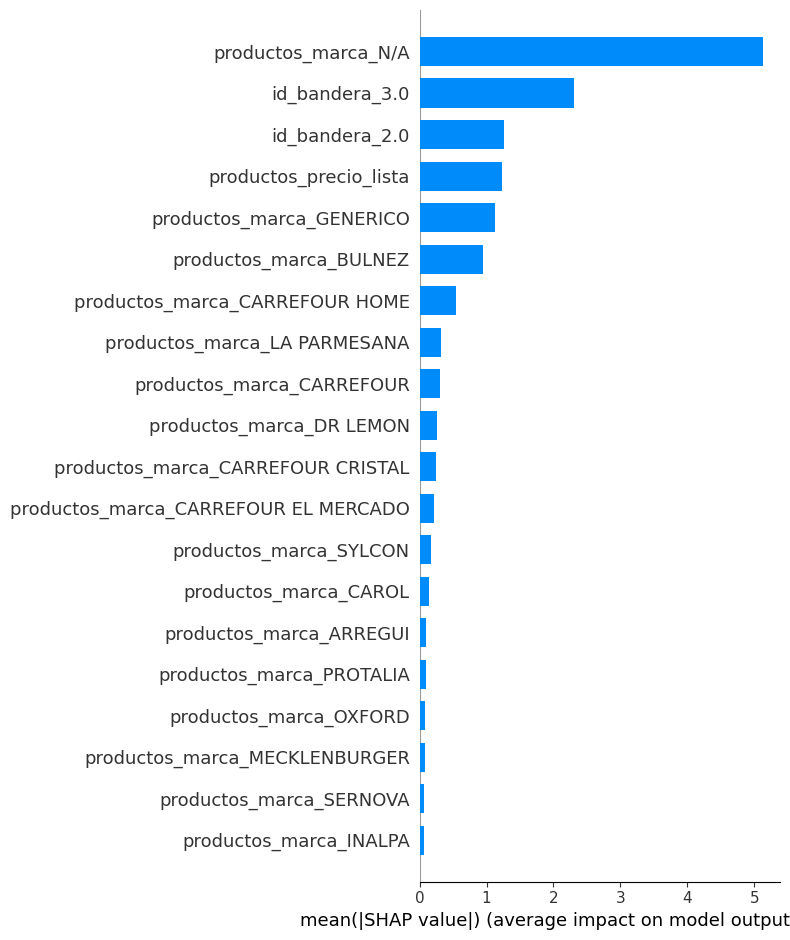

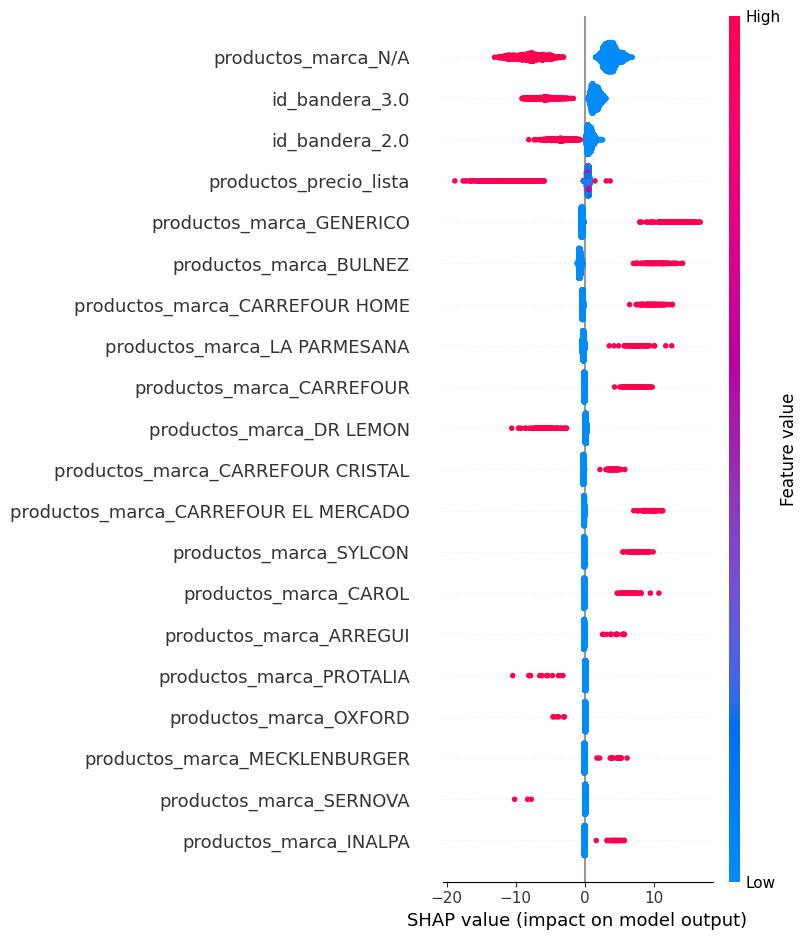

In [3]:
# SHAP turbo: submuestreo + top-N features
import shap, numpy as np, pandas as pd

# Armamos muestra y top features
top_n_feats = 40
n_rows = 4000
rng = np.random.default_rng(42)
rows = rng.choice(len(Xtr_df), size=min(n_rows, len(Xtr_df)), replace=False)

if hasattr(best_est, "feature_importances_"):
    top_feats = (pd.Series(best_est.feature_importances_, index=Xtr_df.columns)
                   .nlargest(top_n_feats).index.tolist())
else:
    top_feats = Xtr_df.columns[:top_n_feats].tolist()

X_sample = Xtr_df.iloc[rows][top_feats]

# Background pequeño
bg = shap.utils.sample(X_sample, 200, random_state=42)

explainer = shap.TreeExplainer(best_est, data=bg, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_sample, check_additivity=False)

# Gráficos
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=True)
shap.summary_plot(shap_values, X_sample, plot_type="dot", show=True)


## Conclusiones de los gráficos SHAP

### 1. Importancia promedio (gráfico de barras)
- **`productos_marca_N/A`** es por lejos la variable más importante (muy por encima del resto).
- Luego vienen **`id_bandera_3.0`**, **`productos_precio_lista`** y **`id_bandera_2.0`** con bastante peso.
- El resto de las marcas (`GENÉRICO`, `BULNEZ`, etc.) aportan muy poco en comparación.

En resumen: el modelo se apoya fuertemente en si la marca es `N/A`, en la bandera (cadena/sucursal) y en el precio de lista.

---

### 2. Impacto en las predicciones (gráfico tipo beeswarm)
- Cada punto es una observación, el color indica el valor de la variable (azul = bajo, rosa = alto).
- El eje X muestra cuánto aumenta o disminuye la predicción.

Ejemplos:
- **`productos_marca_N/A`**: tener esta categoría tiende a **aumentar mucho** la predicción.
- **`id_bandera_3.0`**: cuando vale 3.0 suele empujar hacia arriba las predicciones.
- **`productos_precio_lista`**: precios bajos (azul) bajan la predicción; precios altos (rojo) la suben → consistente.
- Las demás marcas (`CARREFOUR HOME`, `LA PARMESANA`, etc.) tienen un efecto menor y más localizado.

---

### Conclusiones finales
1. **La marca “N/A” domina el modelo**, lo que puede reflejar un sesgo en los datos o un patrón muy fuerte.
2. **El identificador de bandera (cadena/sucursal) pesa bastante**, indicando que la política de cada supermercado influye más que el producto en sí.
3. **El precio de lista tiene un efecto claro y esperable**: a mayor precio, mayor predicción.
4. El resto de marcas aportan marginalmente frente a estas tres variables principales.